## 준비

In [ ]:
!pip install pytorch-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 834.9 kB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 10.3 MB/s eta 0:00:00


In [ ]:
# 코랩에서 한글깨짐을 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

pd.set_option('display.float_format', lambda x: '%.2f' % x)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,224 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# !pip install catboost
!pip install optuna

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.4 MB/s eta 0:00:00


In [ ]:
# # Classification
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib
# from matplotlib import rc
# import statsmodels.api as sm
# import lightgbm as lgb
# import plotly.graph_objects as go
# %matplotlib inline

# import warnings
# warnings.filterwarnings('ignore')
# # from pytorch_tabnet.tab_model import TabNetClassifier
# from scipy.stats.mstats import winsorize
# from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
# from sklearn.linear_model import LogisticRegression, LassoCV, Lasso
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.dummy import DummyClassifier
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
# from sklearn.pipeline import make_pipeline, Pipeline
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from catboost import CatBoostClassifier
# from xgboost import XGBClassifier
# from sklearn.feature_selection import SelectFromModel
# import optuna
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
# from optuna.integration import OptunaSearchCV
# from collections import Counter
# from lightgbm import LGBMClassifier
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.combine import SMOTEENN
# from scipy.stats import ttest_ind
# from scipy import stats
# #나눔고딕 깨짐문제 해결

%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

Selecting previously unselected package fonts-nanum-coding.
(Reading database ... 121775 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


## 전체 가이드라인
+ 상장기업과 외감기업을 통합하는 과정에서 발생한 사업자등록번호 중복 기업들에 대한 해결
+ 상장기업의 경우 약 1800기업에서 약 1200개의 기업만이 살아 남았는데 원본데이터 소실이 너무 크다
  + 해결방법 1 : 상장일 범위를 2000~2023년이 아닌 다른 범위로 설정 (2000년대 초반에 날아가는 기업이 많기 때문에 이 문제를 해결해야함)
  + 헤결방법 2 : 재무비율이 1년치만 있는 경우에는 2년치 재무 비율을 1년치 재무비율로 채워넣기 (각 변수의 절대적 크기만을 보기 때문)
+ 윈저라이징시 지정할 % 범위(현재는 1%인데 왜 1%로 했는지 파악)
+ 결론에 대한 해석
  + feature importance가 높은 변수들에 대한 label별 비교 분석
  + 오분류된 종목들에 대한 분석
  + 분류하지 못한 종목들에 대한 분석

## 파일 불러오기, 전처리

In [ ]:
# reborn = pd.read_csv(path.format('reborn_cop.csv'), index_col=0)
# 외감기업[change_li] = 외감기업[change_li] * 1000
# 상장기업[change_li] = 상장기업[change_li] * 1000
# 외감기업 = 외감기업[filter_col]
# 상장기업 = 상장기업상장기업_total[상장기업['기술특례'] == 0]
# 상장기업 = 상장기업[filter_col]
# 상장기업['기술특례'] = 상장기업_total['기술특례']
# 외감기업['기술특례'] = 0
# 외감기업['기술특례'] = 0

# 상장기업 = 상장기업[상장기업['기술특례'] == 0]

In [ ]:
path = '/content/drive/MyDrive/1차프로젝트/datasets/data_sets_final/{}'
change_li = ['자산총계_1','부채총계_1',	'자본총계_1',	'매출액_1',	'법인세비용차감전(계속사업)손익_1', '영업이익_1',	'당기순이익_1',	'투자활동으로 인한 현금흐름_1', '자산총계','부채총계',	'자본총계',	'매출액',	'법인세비용차감전(계속사업)손익', '영업이익',	'당기순이익',	'투자활동으로 인한 현금흐름']

외감기업 = pd.read_csv(path.format('외감기업(gaap)_회계기준추가.csv'), index_col=0, encoding='cp949')
상장기업 = pd.read_csv(path.format('상장기업(gaap)_회계기준추가.csv'), index_col=0, encoding='cp949')
상장기업.drop('Unnamed: 132', axis=1, inplace=True)
reborn = pd.read_csv(path.format('reborn_cop_20240214.csv'), index_col=0)

filter_col = reborn.columns.tolist()

상장기업_total = pd.read_csv(path.format('상장기업_total.csv'), index_col=0, encoding='cp949')
기술특례 = 상장기업_total[상장기업_total['기술특례'] == 1]
상장기업 = 상장기업[~상장기업['거래소코드'].isin(기술특례['거래소코드'].tolist())]

# 살린기업 죽이기
상장기업 = 상장기업[~상장기업['거래소코드'].isin(reborn['거래소코드'].tolist())]

print(len(상장기업['거래소코드'].unique()))

1016


In [ ]:
print(len(reborn['거래소코드'].unique()))
print(len(기술특례['거래소코드'].unique()))

150
123


In [ ]:
# nan값 확인하기
상장기업.isnull().sum().sort_values(ascending=False)

자산총계_1           0
매출채권회전률          0
총자본회전률           0
이자보상배율(이자비용)     0
차입금비율            0
                ..
인건비 대 총비용비율_1    0
비유동자산증가율_1       0
유동자산증가율_1        0
부가가치율_1          0
IFRS사용           0
Length: 131, dtype: int64

#### 상장기업들의 재무를 기반으로 외감기업들을 필터링하기

In [ ]:
# 레이블 지정
외감기업['label'] = 0
상장기업['label'] = 1
print(f'상장기업 수 : {len(상장기업)}')

상장기업 수 : 1016


#### 외감기업과 상장기업 통합하기



In [ ]:
print(f'상장 기업 수:  {len(상장기업["사업자등록번호"].unique())}')
print(f'외감 기업 수 : {len(외감기업["사업자등록번호"].unique())}')
print(f'외감 기업 수와 상장 기업 수 합 : {len(외감기업["사업자등록번호"].unique()) + len(상장기업["사업자등록번호"].unique())}')

상장 기업 수:  1016
외감 기업 수 : 32652
외감 기업 수와 상장 기업 수 합 : 33668


In [ ]:
cop_concat = pd.concat([외감기업, 상장기업], axis=0).reset_index(drop=True)

In [ ]:
cop_concat.drop(['거래소코드', '거래소코드_1', '법인등록번호_1', '법인등록번호', 'IFRS사용', '업종코드', '업종코드_1', '산업명_1', '산업명', '산업코드'], axis=1, inplace=True)
cop_concat = cop_concat.select_dtypes(exclude=['object'])
cop_concat.isnull().sum().sort_values(ascending=False)

자산총계_1            0
매출액영업이익률          0
비유동비율             0
타인자본구성비율          0
자기자본구성비율          0
                 ..
매출채권회전률_1         0
재고자산회전률_1         0
총자본회전률_1          0
이자보상배율(이자비용)_1    0
label             0
Length: 110, dtype: int64

In [ ]:
cop_concat[['유동자산회전률', '유동자산회전률_1','label']]

,유동자산회전률,유동자산회전률_1,label
0,2.53,1.89,0
1,4.11,3.59,0
2,2.43,3.33,0
3,0.06,0.14,0
4,2.34,4.38,0
...,...,...,...
33663,4.12,2.25,1
33664,3.40,3.07,1
33665,4.68,3.92,1
33666,3.77,3.25,1


#### 원본 데이터 기초통계량

In [ ]:
# 전체 기업
range_index = [20, 40, 60, 80, 100,  -1]

for i in range(len(range_index)):
    first = range_index[i]
    if i >= 1:
        before = range_index[i - 1]
        print(f'----------------------------------- start columns index {before} end columns index {first-1} -----------------------------------')
        print(cop_concat.iloc[:, before:first].describe())
    else:
        print(f'----------------------------------- start columns index 0 end columns index {first-1} -----------------------------------')
        print(cop_concat.iloc[:, :first].describe())

----------------------------------- start columns index 0 end columns index 19 -----------------------------------
           자산총계_1      부채총계_1      자본총계_1       매출액_1  법인세비용차감전(계속사업)손익_1  \
count    33668.00    33668.00    33668.00    33668.00            33668.00   
mean     77456.48    46544.88    30911.61    58422.01             3677.38   
std     586158.70   314311.20   330865.55   401886.97            47270.93   
min          0.00        0.00 -1597026.00   -47257.00         -1624185.00   
25%      15753.75     9178.75     2178.75     5857.75             -208.00   
50%      24793.00    15250.00     7730.50    18056.00              608.00   
75%      50410.75    30276.75    19237.25    40983.50             2769.00   
max   64638690.00 38361337.00 45885419.00 32547597.00          4691993.00   

           영업이익_1     당기순이익_1  투자활동으로 인한 현금흐름_1  총자본증가율_1  영업이익증가율_1  \
count    33668.00    33668.00          33668.00  33668.00   33668.00   
mean      3514.89     2808.81          -5136.75

In [ ]:
# 상장기업
range_index = [20, 40, 60, 80, 100, 120, -1]

for i in range(len(range_index)):
    first = range_index[i]
    if i >= 1:
        before = range_index[i - 1]
        print(f'----------------------------------- start columns index {before} end columns index {first-1} -----------------------------------')
        print(상장기업.iloc[:, before:first].describe())
    else:
        print(f'----------------------------------- start columns index 0 end columns index {first-1} -----------------------------------')
        print(상장기업.iloc[:, :first].describe())

----------------------------------- start columns index 0 end columns index 19 -----------------------------------
          자산총계_1     부채총계_1     자본총계_1      매출액_1  법인세비용차감전(계속사업)손익_1  \
count    1016.00    1016.00    1016.00    1016.00             1016.00   
mean   119195.92   68208.44   50987.48  114517.80             7205.93   
std    446873.12  280326.00  201318.21  386130.98            37315.84   
min         0.00       0.00  -82990.00       0.00          -583223.00   
25%     14622.25    6081.25    6779.25   15480.50             1032.25   
50%     27581.50   13290.50   12828.00   30887.00             2732.00   
75%     60455.00   32330.25   28222.00   66534.75             6402.50   
max   6352833.00 3966238.00 3237003.00 5741248.00           553618.00   

          영업이익_1    당기순이익_1  투자활동으로 인한 현금흐름_1  총자본증가율_1  영업이익증가율_1  순이익증가율_1  \
count    1016.00    1016.00           1016.00   1016.00    1016.00   1016.00   
mean     8871.83    5800.53         -12348.48     19.11      87.81 

In [ ]:
# 외감기업
range_index = [20, 40, 60, 80, 100, 120, -1]

for i in range(len(range_index)):
    first = range_index[i]
    if i >= 1:
        before = range_index[i - 1]
        print(f'----------------------------------- start columns index {before} end columns index {first-1} -----------------------------------')
        print(외감기업.iloc[:, before:first].describe())
    else:
        print(f'----------------------------------- start columns index 0 end columns index {first-1} -----------------------------------')
        print(외감기업.iloc[:, :first].describe())

----------------------------------- start columns index 0 end columns index 19 -----------------------------------
           자산총계_1      부채총계_1      자본총계_1       매출액_1  법인세비용차감전(계속사업)손익_1  \
count    32652.00    32652.00    32652.00    32652.00            32652.00   
mean     76157.71    45870.80    30286.93    56676.53             3567.58   
std     589923.35   315289.90   334074.27   402247.55            47543.52   
min          1.00        0.00 -1597026.00   -47257.00         -1624185.00   
25%      15770.75     9261.00     2064.00     5475.75             -241.00   
50%      24757.50    15289.50     7557.50    17704.00              566.00   
75%      50086.75    30243.75    18944.75    40235.75             2658.25   
max   64638690.00 38361337.00 45885419.00 32547597.00          4691993.00   

           영업이익_1     당기순이익_1  투자활동으로 인한 현금흐름_1  총자본증가율_1  영업이익증가율_1  \
count    32652.00    32652.00          32652.00  32652.00   32652.00   
mean      3348.20     2715.72          -4912.35

In [ ]:
# cop_concat['자산총계_1'] = np.log(cop_concat['자산총계_1'])
# cop_concat['자산총계'] = np.log(cop_concat['자산총계'])
# cop_concat['부채총계_1'] = np.log(cop_concat['부채총계_1'])
# cop_concat['부채총계'] = np.log(cop_concat['부채총계'])
# cop_concat['자본총계_1'] = np.log(cop_concat['자본총계_1'])
# cop_concat['자본총계'] = np.log(cop_concat['자본총계'])

In [ ]:
# cop_concat.isnull().sum().sort_values(ascending=False)
# cop_concat.dropna(inplace=True)
# cop_concat.reset_index(drop=True)
label = cop_concat['label']
cop_concat.drop('label', axis=1, inplace=True)

In [ ]:
상장기업[['자산총계', '부채총계', '자본총계', '매출액', '법인세비용차감전(계속사업)손익', '영업이익', '당기순이익']].describe()

,자산총계,부채총계,자본총계,매출액,법인세비용차감전(계속사업)손익,영업이익,당기순이익
count,1016.00,1016.00,1016.00,1016.00,1016.00,1016.00,1016.00
mean,148214.79,79805.92,68408.90,142582.94,15344.72,14104.14,12956.63
std,535998.88,319626.03,249058.62,464980.52,91701.06,52774.48,75958.25
min,4345.00,784.00,-34559.00,38.00,-248870.00,-203642.00,-249695.00
25%,19923.25,7707.50,10420.00,21655.75,2746.75,2846.25,2379.00
50%,37312.00,16338.50,19296.50,41735.00,5278.50,5376.50,4461.00
75%,80548.50,39350.00,38824.25,88999.75,10058.00,10575.50,8466.25
max,7621234.00,4933433.00,3674071.00,7627917.00,2488063.00,1113793.00,1904946.00


In [ ]:
외감기업[['자산총계', '부채총계', '자본총계', '매출액', '법인세비용차감전(계속사업)손익', '영업이익', '당기순이익']].describe()

,자산총계,부채총계,자본총계,매출액,법인세비용차감전(계속사업)손익,영업이익,당기순이익
count,32652.00,32652.00,32652.00,32652.00,32652.00,32652.00,32652.00
mean,82853.77,49536.32,33317.45,67490.01,3538.93,3850.59,2730.53
std,637303.94,346080.12,361623.59,593362.78,48666.96,45165.96,39850.88
min,0.00,0.00,-1675507.00,-39145.00,-570653.00,-509510.00,-438074.00
25%,16376.50,9055.50,2492.00,5901.00,-313.25,-123.00,-333.00
50%,26623.00,15757.50,8548.50,19295.50,544.00,710.00,460.00
75%,54114.25,32429.25,21128.00,44861.50,2665.00,2598.00,2237.25
max,69129625.00,42843974.00,50019849.00,55656331.00,5422195.00,4399834.00,4365588.00


In [ ]:
상장기업[['자산총계_1', '부채총계_1', '자본총계_1', '매출액_1', '법인세비용차감전(계속사업)손익_1', '영업이익_1', '당기순이익_1']].describe()


,자산총계_1,부채총계_1,자본총계_1,매출액_1,법인세비용차감전(계속사업)손익_1,영업이익_1,당기순이익_1
count,1016.00,1016.00,1016.00,1016.00,1016.00,1016.00,1016.00
mean,119195.92,68208.44,50987.48,114517.80,7205.93,8871.83,5800.53
std,446873.12,280326.00,201318.21,386130.98,37315.84,34660.13,30846.38
min,0.00,0.00,-82990.00,0.00,-583223.00,-100013.00,-512780.00
25%,14622.25,6081.25,6779.25,15480.50,1032.25,1428.75,889.00
50%,27581.50,13290.50,12828.00,30887.00,2732.00,3143.50,2284.00
75%,60455.00,32330.25,28222.00,66534.75,6402.50,7090.50,5247.75
max,6352833.00,3966238.00,3237003.00,5741248.00,553618.00,559022.00,414065.00


In [ ]:
외감기업[['자산총계_1', '부채총계_1', '자본총계_1', '매출액_1', '법인세비용차감전(계속사업)손익_1', '영업이익_1', '당기순이익_1']].describe()


,자산총계_1,부채총계_1,자본총계_1,매출액_1,법인세비용차감전(계속사업)손익_1,영업이익_1,당기순이익_1
count,32652.00,32652.00,32652.00,32652.00,32652.00,32652.00,32652.00
mean,76157.71,45870.80,30286.93,56676.53,3567.58,3348.20,2715.72
std,589923.35,315289.90,334074.27,402247.55,47543.52,37133.69,41306.63
min,1.00,0.00,-1597026.00,-47257.00,-1624185.00,-1171089.00,-1624190.00
25%,15770.75,9261.00,2064.00,5475.75,-241.00,-140.00,-252.00
50%,24757.50,15289.50,7557.50,17704.00,566.00,616.00,483.00
75%,50086.75,30243.75,18944.75,40235.75,2658.25,2366.00,2212.50
max,64638690.00,38361337.00,45885419.00,32547597.00,4691993.00,3274727.00,4523282.00


In [ ]:
원본 = cop_concat.copy()
원본['label'] = label
# 각 변수들에 대해 label1과 label2의 평균값 비교하여 리스트에 넣기
label1_list = []
label2_list = []

for column in 원본.columns:  # 첫 번째 열은 Label이므로 제외
    mean_label1 = 원본[원본['label'] == 1][column].mean()
    mean_label2 = 원본[원본['label'] == 0][column].mean()
    diff = mean_label1 - mean_label2
    if mean_label1 > mean_label2:
        label1_list.append(column)
    else:
        label2_list.append(column)

print("Label1이 큰 변수들:", label1_list)
print("Label2가 큰 변수들:", label2_list)

Label1이 큰 변수들: ['자산총계_1', '부채총계_1', '자본총계_1', '매출액_1', '법인세비용차감전(계속사업)손익_1', '영업이익_1', '당기순이익_1', '총자본증가율_1', '매출액영업이익률_1', '매출액순이익률_1', '총자본순이익률_1', '자기자본순이익률_1', '기업순이익률_1', '유동자산구성비율_1', '자기자본구성비율_1', '부가가치율_1', '순운전자본비율_1', 'CASH FLOW 대 총자본비율_1', 'CASH FLOW 대 매출액비율_1', '종업원_1', '자산총계', '부채총계', '자본총계', '매출액', '법인세비용차감전(계속사업)손익', '영업이익', '당기순이익', '총자본증가율', '영업이익증가율', '순이익증가율', '매출액영업이익률', '매출액순이익률', '총자본순이익률', '기업순이익률', 'R & D 투자효율', '유동자산구성비율', '자기자본구성비율', '총자본회전률', '부가가치율', '순운전자본비율', 'CASH FLOW 대 차입금비율', 'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '종업원', 'label']
Label2가 큰 변수들: ['투자활동으로 인한 현금흐름_1', '영업이익증가율_1', '순이익증가율_1', '재고자산증가율_1', '자기자본증가율_1', '매출액증가율_1', '자기자본영업이익률_1', '금융비용부담률_1', 'R & D 투자효율_1', '타인자본구성비율_1', '비유동비율_1', '유동비율_1', '당좌비율_1', '부채비율_1', '차입금비율_1', '이자보상배율(이자비용)_1', '총자본회전률_1', '재고자산회전률_1', '매출채권회전률_1', '순운전자본회전률_1', '유동자산증가율_1', '비유동자산증가율_1', '인건비 대 총비용비율_1', '재고자산 대 유동자산비율_1', '현금비율_1', '차입금의존도_1', '투자집중도_1', 'CASH FLOW 대 부채비율_1', 'CASH FLOW 대 차입금비율_1', '자기자본회전

## 윈저라이징(이상치) -> train_test_split -> 스케일링(스탠다드나 민맥스)

In [ ]:
##### 윈터라이징

# 하위 1%, 상위 1%를 각각 1%, 99% 백분위 값으로 대체)
# 각 열에 대해 윈저라이징 적용
cop_concat_winsorized = cop_concat.apply(lambda x: winsorize(x, limits=[0.01, 0.01]))
# 이자보상배율은 이자비용값에 따라 크기가 크게 달라져서 이상치 처리
# cop_concat_winsorized[['이자보상배율(이자비용)', '이자보상배율(이자비용)_1']] = cop_concat_winsorized[['이자보상배율(이자비용)', '이자보상배율(이자비용)_1']].apply(lambda x: winsorize(x, limits=[0.111, 0.111]))

#산업코드 drop
cop_concat_winsorized.drop(['산업코드_1'], axis=1, inplace=True)



##### Train test split
X_train, X_test, y_train, y_test = train_test_split(cop_concat_winsorized, label, test_size=0.3, stratify=label, random_state = 42)
#x_train, xtest, y_train, ytest = train_test_split(cop_concat, label, test_size=0.3, stratify=label)



##### MIN-MAX 스케일링

# 제외할 열의 이름 목록
exclude_columns = ['산업코드', '존속기간', '종업원', '산업명', '산업코드_1', '존속기간_1', '종업원_1', '산업명_1']

# Min-Max 스케일링
scaler = MinMaxScaler()

# 제외할 열을 제외하고 스케일링할 열만 추출
include_columns = [col for col in X_train.columns if col not in exclude_columns]
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Train 세트에 대해 스케일링 적용
X_train_scaled[include_columns] = scaler.fit_transform(X_train[include_columns])

# Test 세트에 대해 Train 세트에서 추출된 최소 및 최대 값으로 스케일링 적용
X_test_scaled[include_columns] = scaler.transform(X_test[include_columns])

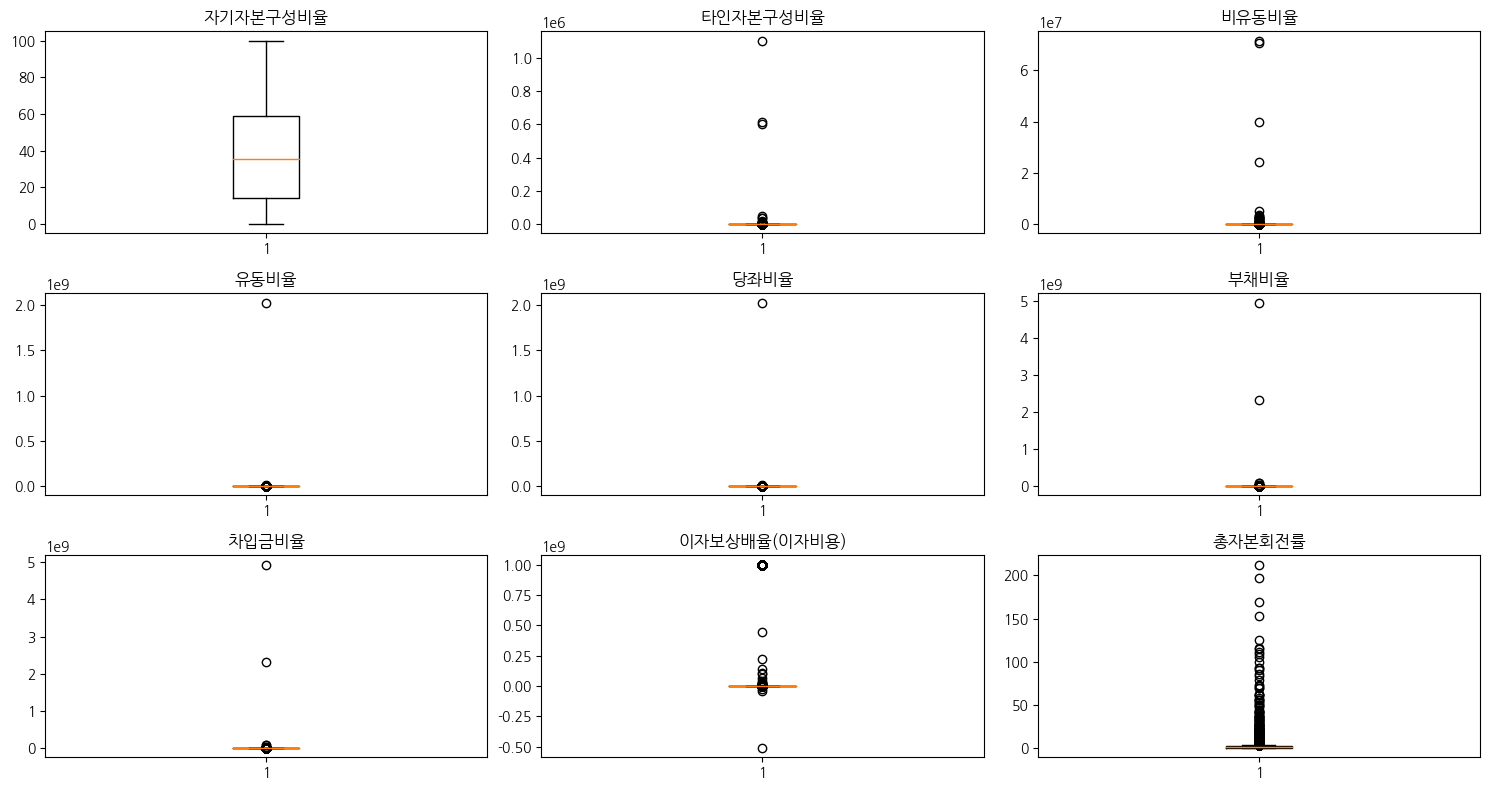

In [ ]:
X_train_box, X_test_box, y_train_box, y_test_box = train_test_split(cop_concat, label, test_size=0.3, stratify=label, random_state = 42)
num_variables = len(X_train_box.columns[:9])
num_rows = 3  # subplot의 행 수
num_cols = 3
# X_train_box의 각 열에 대한 박스 플롯을 그리기
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

for i, column in enumerate(cop_concat.columns[78:87]):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].boxplot(cop_concat[column])
    axes[row, col].set_title(column)

# 남은 서브플롯은 비워둠
for i in range(num_variables, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

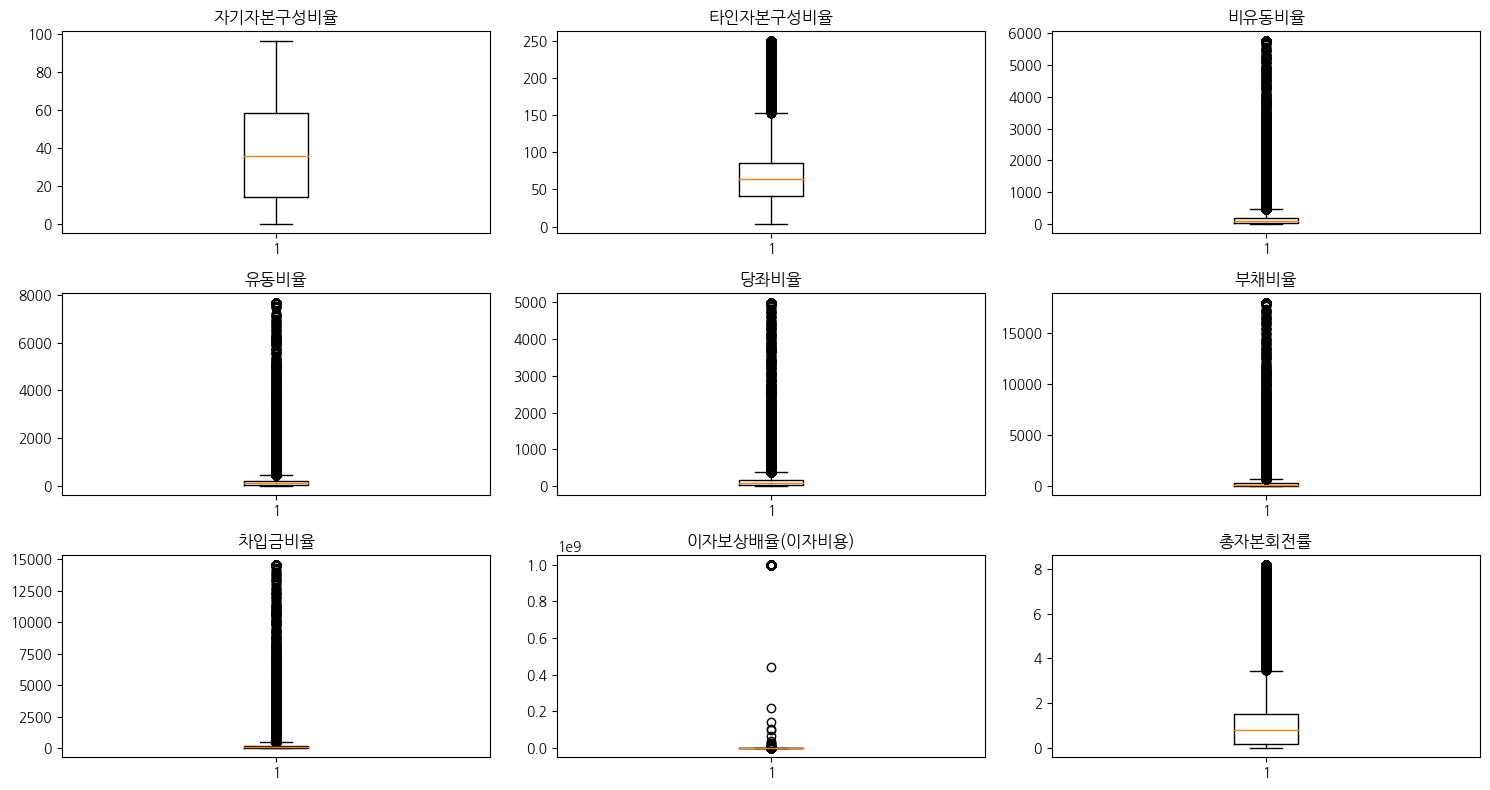

In [ ]:
# X_train_box의 각 열에 대한 박스 플롯을 그리기
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

for i, column in enumerate(cop_concat_winsorized.columns[77:86]):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].boxplot(cop_concat_winsorized[column])
    axes[row, col].set_title(column)

# 남은 서브플롯은 비워둠
for i in range(num_variables, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

## Q-Qplot

In [ ]:
print(f'X train 수 : {len(X_train)}')
print(f'X test 수 : {len(X_test)}')

X train 수 : 23567
X test 수 : 10101


In [ ]:
print(f'train 레이블 분포\n{y_train.value_counts()}')
print(f'test 레이블 분포\n{y_test.value_counts()}')

train 레이블 분포
0    22856
1      711
Name: label, dtype: int64
test 레이블 분포
0    9796
1     305
Name: label, dtype: int64


In [ ]:
train_df = pd.concat([X_train_scaled, y_train], axis=1).reset_index(drop=True)

In [ ]:
train_df['매출액'].describe()

count   23567.00
mean        0.07
std         0.14
min         0.00
25%         0.01
50%         0.03
75%         0.06
max         1.00
Name: 매출액, dtype: float64

## Describe로 eda

## 변수 선정 - Lasso

In [ ]:
# from sklearn.model_selection import train_test_split

# 라쏘 회귀 모델 학습
# alpha = 0.0007 # 알파값 설정
alpha = 0.001# 알파값 설정
# alpha = 0.0005# 알파값 설정


lasso = Lasso(alpha=alpha)
lasso.fit(X_train_scaled, y_train)

# 피처별 중요도 확인
feature_importance = dict(zip(X_train_scaled.columns, lasso.coef_))
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

select_fe = []
# 중요도가 높은 피처 출력
for feature, coef in sorted_feature_importance:
  print(f"{feature}: {coef}")
  select_fe.append(feature)


# 중요도가 0이 아닌 피처들의 개수 세기
중요피처= sum(coef != 0 for coef in lasso.coef_)
print("\n\n 중요피처:", 중요피처)

기업순이익률: 0.13107397004583698
총자본증가율: 0.10604660505603831
R & D 투자효율_1: 0.060147224265135205
R & D 투자효율: 0.035415644548481534
자기자본구성비율: 0.019844130918284898
이자보상배율(이자비용)_1: -0.012657787951336553
순운전자본회전률_1: -0.008794022110417372
유동자산회전률_1: -0.007750159526810426
유동자산구성비율: 0.0019705149645817053
이자보상배율(이자비용): -0.001712530305686607
종업원: 0.0004944021873331612
종업원_1: -0.0003241505501710424
CASH FLOW 대 총자본비율_1: 0.00014695597408463648
자산총계_1: -0.0
부채총계_1: -0.0
자본총계_1: -0.0
매출액_1: -0.0
법인세비용차감전(계속사업)손익_1: -0.0
영업이익_1: 0.0
당기순이익_1: -0.0
투자활동으로 인한 현금흐름_1: -0.0
총자본증가율_1: 0.0
영업이익증가율_1: 0.0
순이익증가율_1: 0.0
재고자산증가율_1: -0.0
자기자본증가율_1: 0.0
매출액증가율_1: 0.0
매출액영업이익률_1: 0.0
매출액순이익률_1: 0.0
총자본순이익률_1: 0.0
자기자본영업이익률_1: 0.0
자기자본순이익률_1: 0.0
기업순이익률_1: 0.0
금융비용부담률_1: -0.0
유동자산구성비율_1: 0.0
자기자본구성비율_1: 0.0
타인자본구성비율_1: -0.0
비유동비율_1: -0.0
유동비율_1: -0.0
당좌비율_1: -0.0
부채비율_1: -0.0
차입금비율_1: -0.0
총자본회전률_1: -0.0
재고자산회전률_1: -0.0
매출채권회전률_1: -0.0
부가가치율_1: 0.0
유동자산증가율_1: -0.0
비유동자산증가율_1: -0.0
인건비 대 총비용비율_1: -0.0
재고자산 대 유동자산비율_1: 0.0

In [ ]:
select_fe = select_fe[:13]

train_df1 = train_df[select_fe]
train_df1['label'] = train_df['label']

#### 원본 데이터 기초통계량

In [ ]:
cop_concat[cop_concat.duplicated()]

,자산총계_1,부채총계_1,자본총계_1,매출액_1,법인세비용차감전(계속사업)손익_1,영업이익_1,당기순이익_1,투자활동으로 인한 현금흐름_1,총자본증가율_1,영업이익증가율_1,...,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,자기자본회전률,유동자산회전률,재고자산회전기간,비유동자산회전률,총자본투자효율,종업원
30828,27583,27582,1,0,0,-1,0,-25000,0.00,0.00,...,-0.39,0.00,-0.43,0.00,0.00,0.00,0.00,0.00,-9.43,0


In [ ]:
# 상장기업[select_fe].describe()
null_scaled = X_train.copy()
null_scaled['label'] = y_train
null_scaled_label_0 = null_scaled[null_scaled['label'] == 0]
null_scaled_label_1 = null_scaled[null_scaled['label'] == 1]

In [ ]:
null_scaled_label_1[select_fe].describe()

,기업순이익률,총자본증가율,R & D 투자효율_1,R & D 투자효율,자기자본구성비율,이자보상배율(이자비용)_1,순운전자본회전률_1,유동자산회전률_1,유동자산구성비율,이자보상배율(이자비용),종업원,종업원_1,CASH FLOW 대 총자본비율_1
count,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00
mean,15.48,38.45,1.99,1.91,53.84,61888247.46,1.42,2.50,57.81,63295553.98,290.90,289.80,9.29
std,11.27,41.13,3.22,2.88,17.80,241114668.11,0.73,1.57,18.79,243656153.43,328.63,326.64,11.97
min,-51.77,-46.71,0.00,0.00,0.00,-199.62,0.00,0.00,0.13,-199.78,0.00,0.00,-50.12
25%,8.79,11.66,0.00,0.00,41.49,3.77,0.95,1.57,45.30,6.09,79.00,79.00,2.58
50%,13.42,26.63,0.50,0.64,53.03,9.85,1.31,2.20,58.70,16.51,167.00,167.00,8.67
75%,20.36,50.52,2.62,2.60,66.62,34.68,1.75,3.17,71.72,61.44,346.00,346.00,16.05
max,45.64,163.21,13.84,14.04,96.59,999999999.00,7.42,23.91,98.91,999999999.00,1267.00,1267.00,42.69


In [ ]:
null_scaled_label_0[select_fe].describe()

,기업순이익률,총자본증가율,R & D 투자효율_1,R & D 투자효율,자기자본구성비율,이자보상배율(이자비용)_1,순운전자본회전률_1,유동자산회전률_1,유동자산구성비율,이자보상배율(이자비용),종업원,종업원_1,CASH FLOW 대 총자본비율_1
count,22856.00,22856.00,22856.00,22856.00,22856.00,22856.00,22856.00,22856.00,22856.00,22856.00,22856.00,22856.00,22856.00
mean,3.38,8.83,0.58,0.57,37.29,115848144.59,1.40,3.01,49.14,111313011.23,83.19,83.19,1.71
std,12.29,31.93,1.91,1.91,27.95,319965101.72,1.63,3.75,31.50,314464411.99,171.23,171.23,14.48
min,-51.77,-70.22,0.00,0.00,0.00,-199.62,0.00,0.00,0.00,-199.78,0.00,0.00,-50.12
25%,-0.29,-4.17,0.00,0.00,13.07,-0.06,0.33,0.81,21.86,-0.01,6.00,6.00,-1.69
50%,3.16,3.30,0.00,0.00,34.72,3.12,1.01,2.04,47.65,2.45,32.00,32.00,2.60
75%,7.56,16.08,0.00,0.00,58.00,28.77,1.80,3.68,76.19,18.46,79.00,79.00,8.37
max,45.64,163.21,13.84,14.04,96.59,999999999.00,9.90,23.91,99.97,999999999.00,1267.00,1267.00,42.69


In [ ]:
# def plot_qqplots(df):
#     # Determine the number of columns
#     num_cols = df.shape[1]

#     # Calculate the number of rows and columns for subplots
#     num_rows = int(np.ceil(num_cols / 2))
#     num_cols_subplot = 2

#     # Create subplots
#     fig, axs = plt.subplots(num_rows, num_cols_subplot, figsize=(12, num_rows*3))

#     # Flatten axes to handle 1D indexing
#     axs = axs.flatten()

#     for i, column in enumerate(df.columns):
#         # Calculate quantiles for the range of interest (1st quartile to 3rd quartile)
#         q1, q3 = np.percentile(df[column], [25, 75])
#         range_of_interest = df[(df[column] >= q1) & (df[column] <= q3)][column]

#         # Generate Q-Q plot for the range of interest
#         stats.probplot(range_of_interest, dist="norm", plot=axs[i])
#         axs[i].set_title(f'Q-Q plot for {column}')
#         axs[i].set_xlabel('Theoretical quantiles')
#         axs[i].set_ylabel('Ordered Values')

#     # Adjust layout
#     plt.tight_layout()
#     plt.show()

# # Example usage:
# # Assuming df is your DataFrame containing multiple columns
# plot_qqplots(null_scaled_label_1[select_fe])

In [ ]:
label1 = train_df1[train_df1['label'] == 1]
label1 = label1.drop('label', axis=1)
label0 = train_df1[train_df1['label'] == 0]
label0 = label0.drop('label', axis=1)

#### Scaled 데이터 기초통계량

In [ ]:
label1[select_fe].describe()


,기업순이익률,총자본증가율,R & D 투자효율_1,R & D 투자효율,자기자본구성비율,이자보상배율(이자비용)_1,순운전자본회전률_1,유동자산회전률_1,유동자산구성비율,이자보상배율(이자비용),종업원,종업원_1,CASH FLOW 대 총자본비율_1
count,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00
mean,0.69,0.47,0.14,0.14,0.56,0.06,0.14,0.10,0.58,0.06,290.90,289.80,0.64
std,0.12,0.18,0.23,0.21,0.18,0.24,0.07,0.07,0.19,0.24,328.63,326.64,0.13
min,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.62,0.35,0.00,0.00,0.43,0.00,0.10,0.07,0.45,0.00,79.00,79.00,0.57
50%,0.67,0.41,0.04,0.05,0.55,0.00,0.13,0.09,0.59,0.00,167.00,167.00,0.63
75%,0.74,0.52,0.19,0.19,0.69,0.00,0.18,0.13,0.72,0.00,346.00,346.00,0.71
max,1.00,1.00,1.00,1.00,1.00,1.00,0.75,1.00,0.99,1.00,1267.00,1267.00,1.00


In [ ]:
label0[select_fe].describe()

,기업순이익률,총자본증가율,R & D 투자효율_1,R & D 투자효율,자기자본구성비율,이자보상배율(이자비용)_1,순운전자본회전률_1,유동자산회전률_1,유동자산구성비율,이자보상배율(이자비용),종업원,종업원_1,CASH FLOW 대 총자본비율_1
count,22856.00,22856.00,22856.00,22856.00,22856.00,22856.00,22856.00,22856.00,22856.00,22856.00,22856.00,22856.00,22856.00
mean,0.57,0.34,0.04,0.04,0.39,0.12,0.14,0.13,0.49,0.11,83.19,83.19,0.56
std,0.13,0.14,0.14,0.14,0.29,0.32,0.16,0.16,0.32,0.31,171.23,171.23,0.16
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.53,0.28,0.00,0.00,0.14,0.00,0.03,0.03,0.22,0.00,6.00,6.00,0.52
50%,0.56,0.31,0.00,0.00,0.36,0.00,0.10,0.09,0.48,0.00,32.00,32.00,0.57
75%,0.61,0.37,0.00,0.00,0.60,0.00,0.18,0.15,0.76,0.00,79.00,79.00,0.63
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1267.00,1267.00,1.00


#### T-test를 활용한 변수 필터링

+ 정규성 검증 --> minmax사용
+ 등분산성을 만족하지 않아 이분산성을 사용함
+ 최종적으로 선정된 피쳐는 라쏘와 ttest의 교집합은 1

In [ ]:
from scipy.stats import shapiro
# H0 : 정규분포를 따른다
# H1 : 정규분포를 따르지 않는다

# 각 열에 대해 샤피로-윌크 정규성 검정 수행
for column in null_scaled[select_fe].columns:
    stat, p = shapiro(null_scaled[column])
    print(f'열 {column}의 샤피로-윌크 검정 통계량: {stat}, p-value: {p}')

열 기업순이익률의 샤피로-윌크 검정 통계량: 0.8540695309638977, p-value: 0.0
열 총자본증가율의 샤피로-윌크 검정 통계량: 0.8189100027084351, p-value: 0.0
열 R & D 투자효율_1의 샤피로-윌크 검정 통계량: 0.3533761501312256, p-value: 0.0
열 R & D 투자효율의 샤피로-윌크 검정 통계량: 0.35010606050491333, p-value: 0.0
열 자기자본구성비율의 샤피로-윌크 검정 통계량: 0.9476417303085327, p-value: 0.0
열 이자보상배율(이자비용)_1의 샤피로-윌크 검정 통계량: 0.3689917325973511, p-value: 0.0
열 순운전자본회전률_1의 샤피로-윌크 검정 통계량: 0.7338724136352539, p-value: 0.0
열 유동자산회전률_1의 샤피로-윌크 검정 통계량: 0.678874135017395, p-value: 0.0
열 유동자산구성비율의 샤피로-윌크 검정 통계량: 0.9462199211120605, p-value: 0.0
열 이자보상배율(이자비용)의 샤피로-윌크 검정 통계량: 0.36104267835617065, p-value: 0.0
열 종업원의 샤피로-윌크 검정 통계량: 0.47778868675231934, p-value: 0.0
열 종업원_1의 샤피로-윌크 검정 통계량: 0.4780123233795166, p-value: 0.0
열 CASH FLOW 대 총자본비율_1의 샤피로-윌크 검정 통계량: 0.8748849034309387, p-value: 0.0


In [ ]:
null_scaled[select_fe]

,기업순이익률,총자본증가율,R & D 투자효율_1,R & D 투자효율,자기자본구성비율,이자보상배율(이자비용)_1,순운전자본회전률_1,유동자산회전률_1,유동자산구성비율,이자보상배율(이자비용),종업원,종업원_1,CASH FLOW 대 총자본비율_1
19592,1.31,8.98,0.00,0.00,0.39,1.03,0.04,0.06,3.57,1.05,8,8,5.02
23750,-2.87,30.57,0.00,0.00,18.12,999999999.00,0.00,0.04,1.45,999999999.00,0,0,-0.24
2549,-2.36,-9.75,0.00,0.00,20.88,-0.29,0.24,0.52,8.65,-1.00,11,11,-0.64
8484,3.62,12.05,1.01,0.85,80.07,999999999.00,2.21,2.92,26.84,16.58,626,626,7.60
22776,12.89,-30.05,0.00,0.00,10.08,1.08,0.86,0.97,96.16,2.79,3,3,4.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2.52,-8.33,0.00,0.00,18.02,0.91,0.23,0.33,24.45,0.95,4,4,-0.69
16556,5.78,5.21,1.86,1.55,29.21,5.90,0.59,1.09,62.80,5.25,87,87,12.11
4183,44.88,-20.10,0.00,0.00,20.88,-7.30,1.23,11.95,24.93,-10.17,1,1,-2.81
4577,-1.02,1.81,0.00,0.00,10.57,-0.20,0.66,2.47,23.44,-1.72,24,24,6.54


In [ ]:
select_fe_final = []

for column in cop_concat[select_fe].columns:
    asd = cop_concat[select_fe].copy()
    asd['label'] = label
    group1 = asd[asd['label'] == 0][column].dropna()  # 첫 번째 그룹 데이터
    group2 = asd[asd['label'] == 1][column].dropna()  # 두 번째 그룹 데이터 (예시로 똑같은 데이터 사용)

    # t-test 수행
    t_statistic, p_value = ttest_ind(group1, group2, equal_var=False)

    # 결과 출력

    print(f'열 {column}에 대한 t-test 결과 - t-statistic: {t_statistic}, p-value: {p_value}')

    if p_value <= 0.01:
      select_fe_final.append(column)

열 기업순이익률에 대한 t-test 결과 - t-statistic: -26.63588666251528, p-value: 2.019861531701753e-121
열 총자본증가율에 대한 t-test 결과 - t-statistic: -7.147884849764488, p-value: 1.6692742744612906e-12
열 R & D 투자효율_1에 대한 t-test 결과 - t-statistic: 1.8713321769893094, p-value: 0.06130792923506104
열 R & D 투자효율에 대한 t-test 결과 - t-statistic: -0.6908548862652674, p-value: 0.4898029660503599
열 자기자본구성비율에 대한 t-test 결과 - t-statistic: -28.056714109888567, p-value: 6.2088523528468076e-133
열 이자보상배율(이자비용)_1에 대한 t-test 결과 - t-statistic: 7.33109369063211, p-value: 4.333199230620331e-13
열 순운전자본회전률_1에 대한 t-test 결과 - t-statistic: 1.1550778773420847, p-value: 0.24806698671185196
열 유동자산회전률_1에 대한 t-test 결과 - t-statistic: 1.173353505157548, p-value: 0.24066263320017742
열 유동자산구성비율에 대한 t-test 결과 - t-statistic: -12.887114812165956, p-value: 1.1157328386937531e-35
열 이자보상배율(이자비용)에 대한 t-test 결과 - t-statistic: 6.329162814196006, p-value: 3.5537336728197043e-10
열 종업원에 대한 t-test 결과 - t-statistic: -7.762938685268212, p-value: 2.0092748147113

In [ ]:
# select_fe_final = []

# for column in null_scaled[select_fe].columns:
#     asd = null_scaled[select_fe].copy()
#     asd['label'] = null_scaled['label']
#     group1 = asd[asd['label'] == 0][column].dropna()  # 첫 번째 그룹 데이터
#     group2 = asd[asd['label'] == 1][column].dropna()  # 두 번째 그룹 데이터 (예시로 똑같은 데이터 사용)

#     # t-test 수행
#     t_statistic, p_value = ttest_ind(group1, group2, equal_var=False)

#     # 결과 출력
#     print(f'열 {column}에 대한 t-test 결과 - t-statistic: {t_statistic}, p-value: {p_value}')

#     if p_value <= 0.05:
#       select_fe_final.append(column)

In [ ]:
len(select_fe_final)


9

In [ ]:
# 상장기업[select_fe].describe()
null_scaled = X_train.copy()
null_scaled['label'] = y_train
null_scaled_label_0 = null_scaled[null_scaled['label'] == 0]
null_scaled_label_1 = null_scaled[null_scaled['label'] == 1]

In [ ]:
select_fe_final

['기업순이익률',
 '총자본증가율',
 '자기자본구성비율',
 '이자보상배율(이자비용)_1',
 '유동자산구성비율',
 '이자보상배율(이자비용)',
 '종업원',
 '종업원_1',
 'CASH FLOW 대 총자본비율_1']

In [ ]:
lw = select_fe_final.copy()
lw.append('label')
ls = X_train.copy()
ls['label'] = y_train
ls[lw].groupby('label').describe()

기업순이익률                                              총자본증가율        ...  \
         count  mean   std    min   25%   50%   75%   max    count  mean  ...   
label                                                                     ...   
0     22856.00  3.38 12.29 -51.77 -0.29  3.16  7.56 45.64 22856.00  8.83  ...   
1       711.00 15.48 11.27 -51.77  8.79 13.42 20.36 45.64   711.00 38.45  ...   

       종업원_1         CASH FLOW 대 총자본비율_1                                     \
         75%     max               count mean   std    min   25%  50%   75%   
label                                                                         
0      79.00 1267.00            22856.00 1.71 14.48 -50.12 -1.69 2.60  8.37   
1     346.00 1267.00              711.00 9.29 11.97 -50.12  2.58 8.67 16.05   

             
        max  
label        
0     42.69  
1     42.69  

[2 rows x 72 columns]

In [ ]:
lw = select_fe_final.copy()
lw.append('label')
ls = train_df1.copy()
# ls[lw].groupby('label').describe()
result = ls[lw].groupby('label').mean()
print(result)

       기업순이익률  총자본증가율  자기자본구성비율  이자보상배율(이자비용)_1  유동자산구성비율  이자보상배율(이자비용)  \
label                                                                     
0        0.57    0.34      0.39            0.12      0.49          0.11   
1        0.69    0.47      0.56            0.06      0.58          0.06   

         종업원  종업원_1  CASH FLOW 대 총자본비율_1  
label                                     
0      83.19  83.19                 0.56  
1     290.90 289.80                 0.64  


In [ ]:
lp = ls[lw]
label1_lw = lp[lp['label'] == 1]
label0_lw = lp[lp['label'] == 0]

In [ ]:
lp.columns

Index(['기업순이익률', '총자본증가율', '자기자본구성비율', '이자보상배율(이자비용)_1', '유동자산구성비율',
       '이자보상배율(이자비용)', '종업원', '종업원_1', 'CASH FLOW 대 총자본비율_1', 'label'],
      dtype='object')

In [ ]:
col_rename_change = ['기업순이익률_1', '총자본증가율_1', '자기자본구성비율_1', '이자보상배율(이자비용)_2', '유동자산구성비율_1',
       '이자보상배율(이자비용)_1', '종업원_1', '종업원_2', 'CASH FLOW 대 총자본비율_2', 'class']
lp.columns = col_rename_change
label1_lw.columns = col_rename_change
label0_lw.columns = col_rename_change


In [ ]:
# plt.figure(figsize=(10, 8))
# sns.heatmap(lp.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()

#### 후보 변수들의 scaling된 분포 확인


In [ ]:
상장기업[['이자보상배율(이자비용)', '이자보상배율(이자비용)_1']].describe()

,이자보상배율(이자비용),이자보상배율(이자비용)_1
count,1016.00,1016.00
mean,62995362.70,60043443.66
std,243067620.56,237675742.97
min,-5051.25,-3231.12
25%,6.09,3.39
50%,16.59,9.72
75%,62.18,35.21
max,999999999.00,999999999.00


In [ ]:
외감기업[['이자보상배율(이자비용)', '이자보상배율(이자비용)_1']].describe()

,이자보상배율(이자비용),이자보상배율(이자비용)_1
count,32652.00,32652.00
mean,112512502.45,116232964.04
std,315991116.01,320460862.11
min,-512434467.00,-7752396.85
25%,0.01,-0.04
50%,2.50,3.18
75%,19.29,29.33
max,999999999.00,1204771908.00


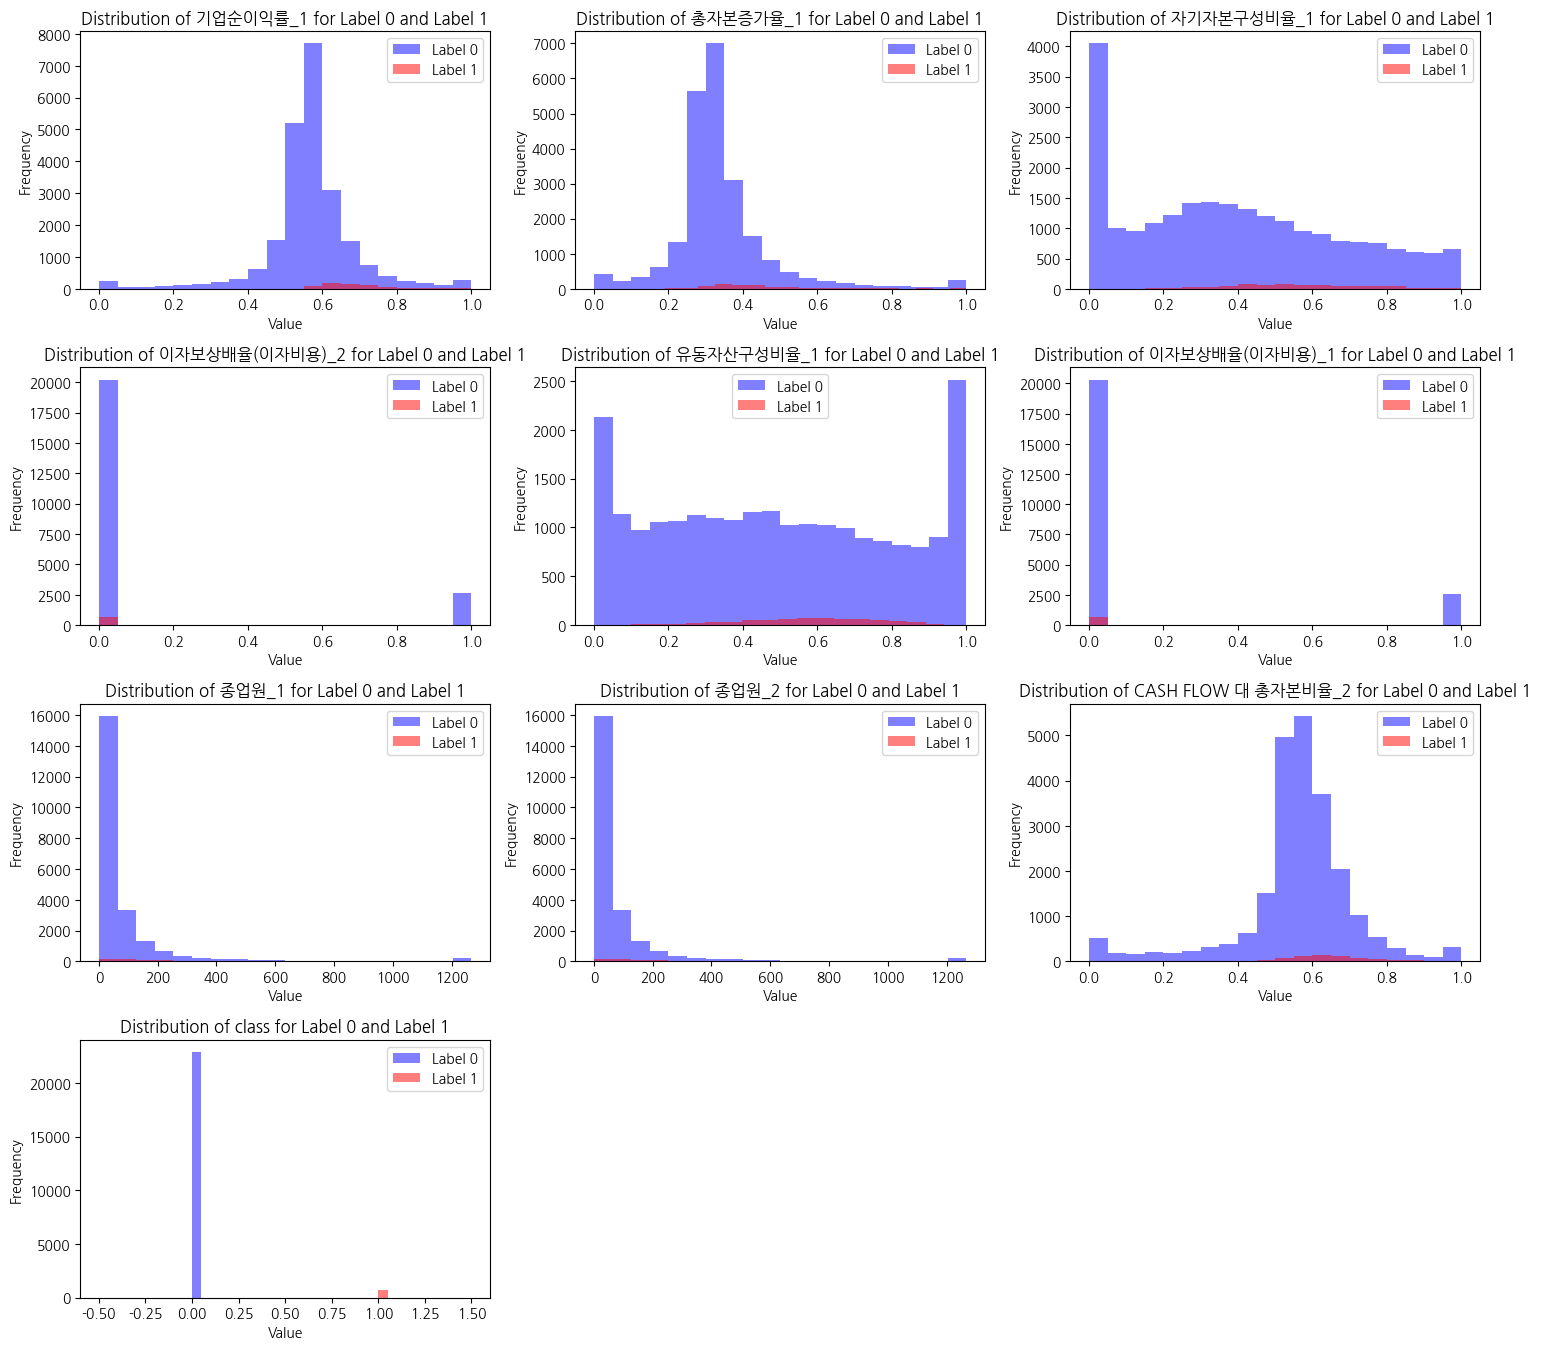

In [ ]:
# 변수 리스트
variables = lp.columns.tolist()

# subplot을 위한 행과 열 개수 설정
num_rows = 9  # 예시에서는 6행으로 설정합니다.
num_cols = 3  # 18개의 변수를 6x3의 subplot에 배치합니다.

# 총 18개의 변수에 대해 subplot에 히스토그램 그리기
plt.figure(figsize=(15, 30))

for i, var in enumerate(variables):
    plt.subplot(num_rows, num_cols, i+1)
    plt.hist(label0_lw[var], bins=20, alpha=0.5, color='blue', label='Label 0')
    plt.hist(label1_lw[var], bins=20, alpha=0.5, color='red', label='Label 1')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {var} for Label 0 and Label 1')
    plt.legend()

plt.tight_layout()
plt.show()


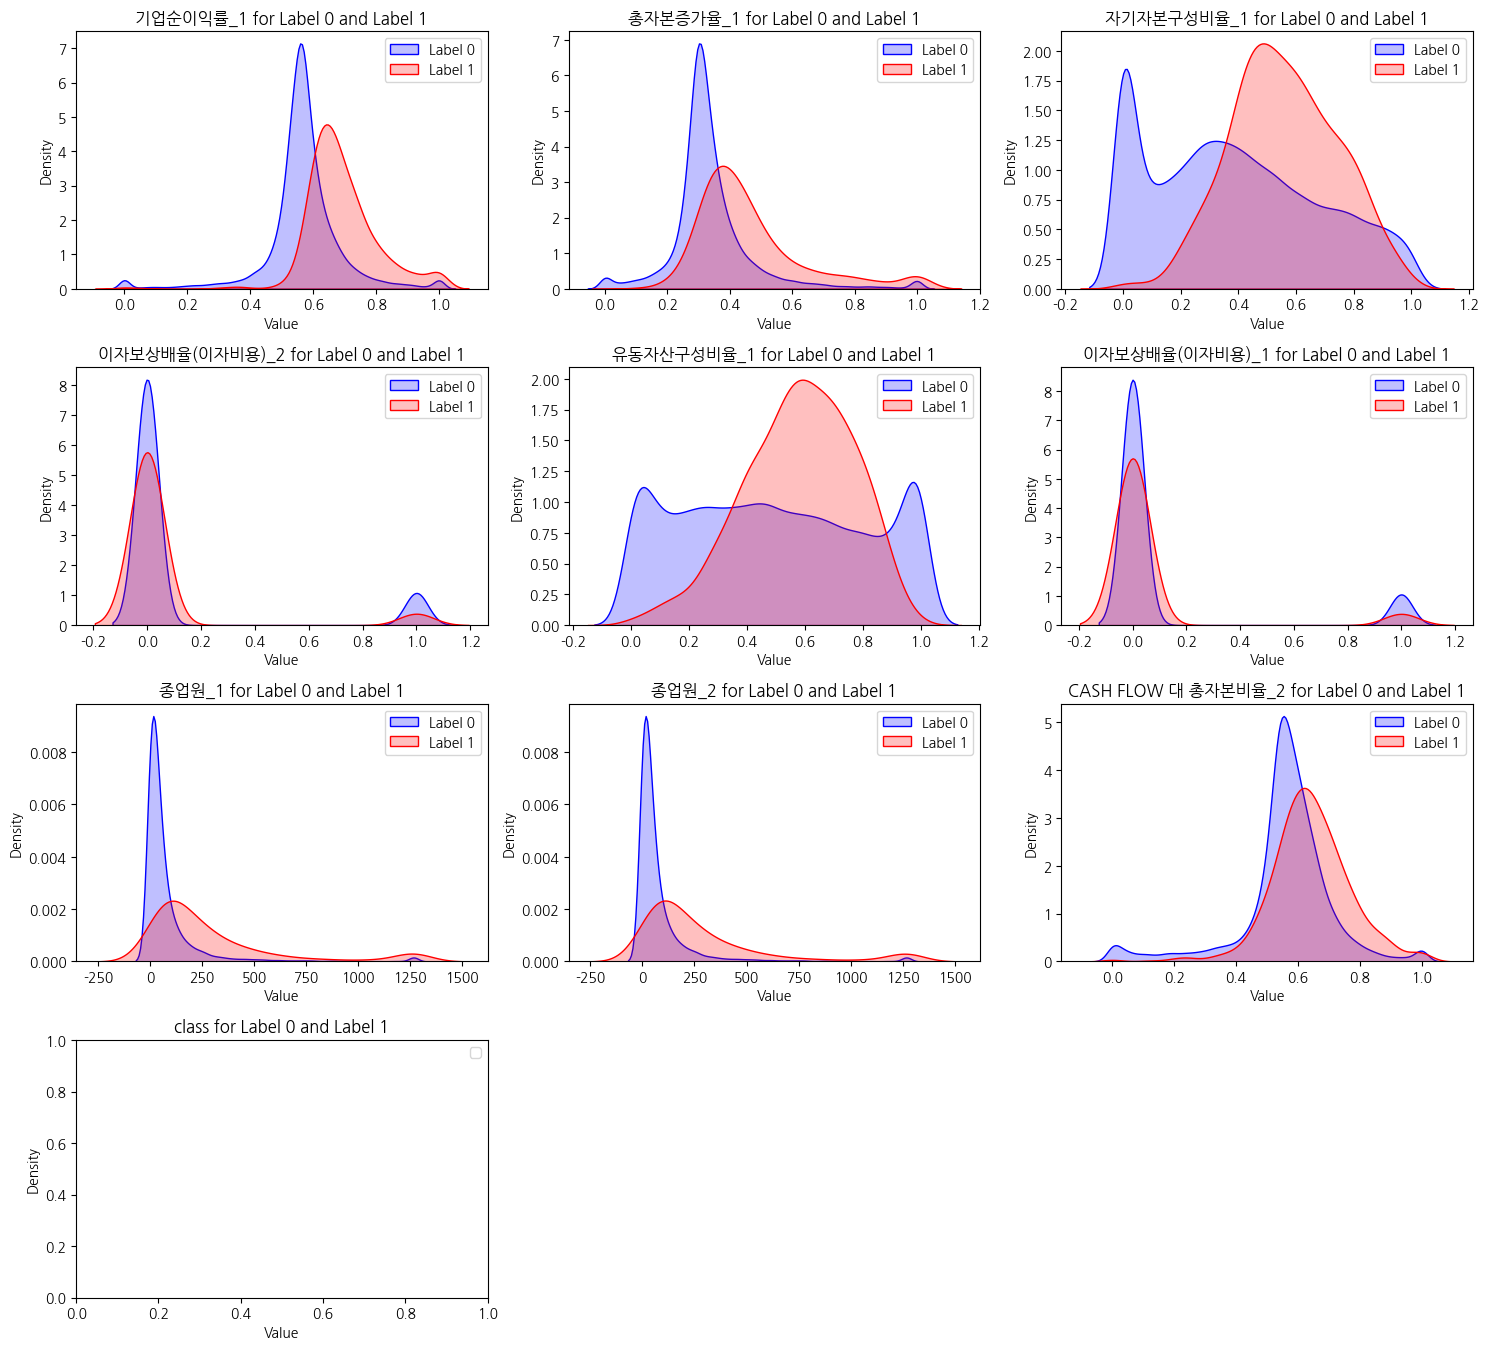

In [ ]:


# 변수 리스트
variables = lp.columns.tolist()

# subplot을 위한 행과 열 개수 설정
num_rows = 9  # 예시에서는 6행으로 설정합니다.
num_cols = 3  # 18개의 변수를 6x3의 subplot에 배치합니다.

# 총 18개의 변수에 대해 subplot에 kdeplot 그리기
plt.figure(figsize=(15, 30))

for i, var in enumerate(variables):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(data=label0_lw[var], color='blue', label='Label 0', shade=True)
    sns.kdeplot(data=label1_lw[var], color='red', label='Label 1', shade=True)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(f'{var} for Label 0 and Label 1')
    plt.legend()

plt.tight_layout()
plt.show()


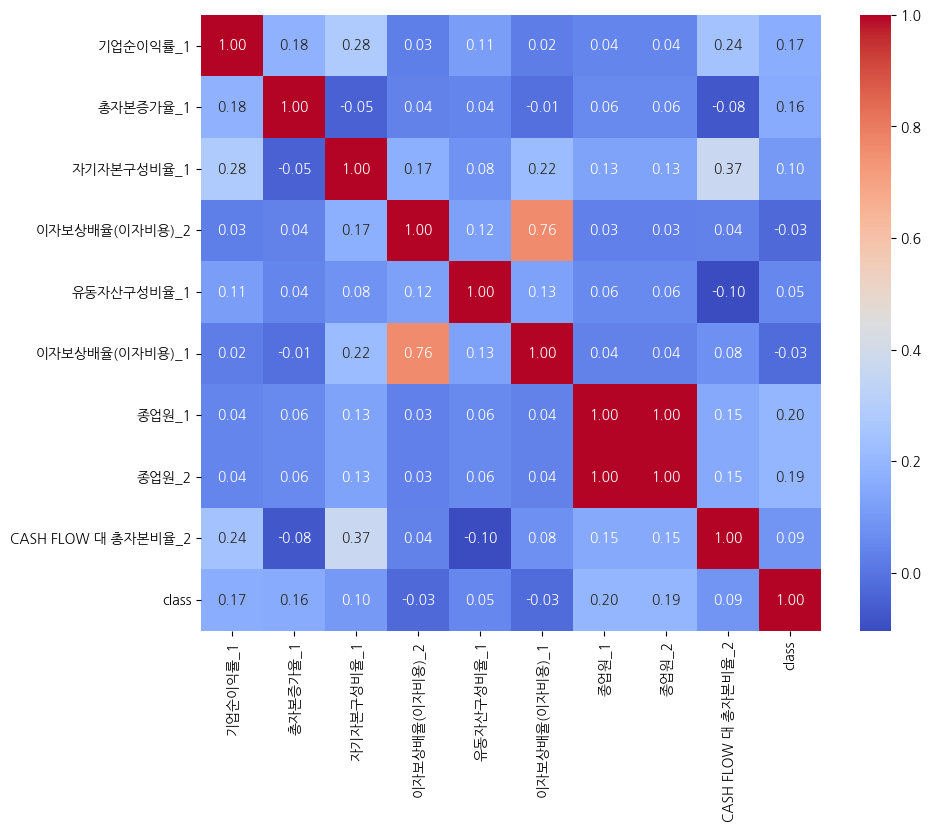

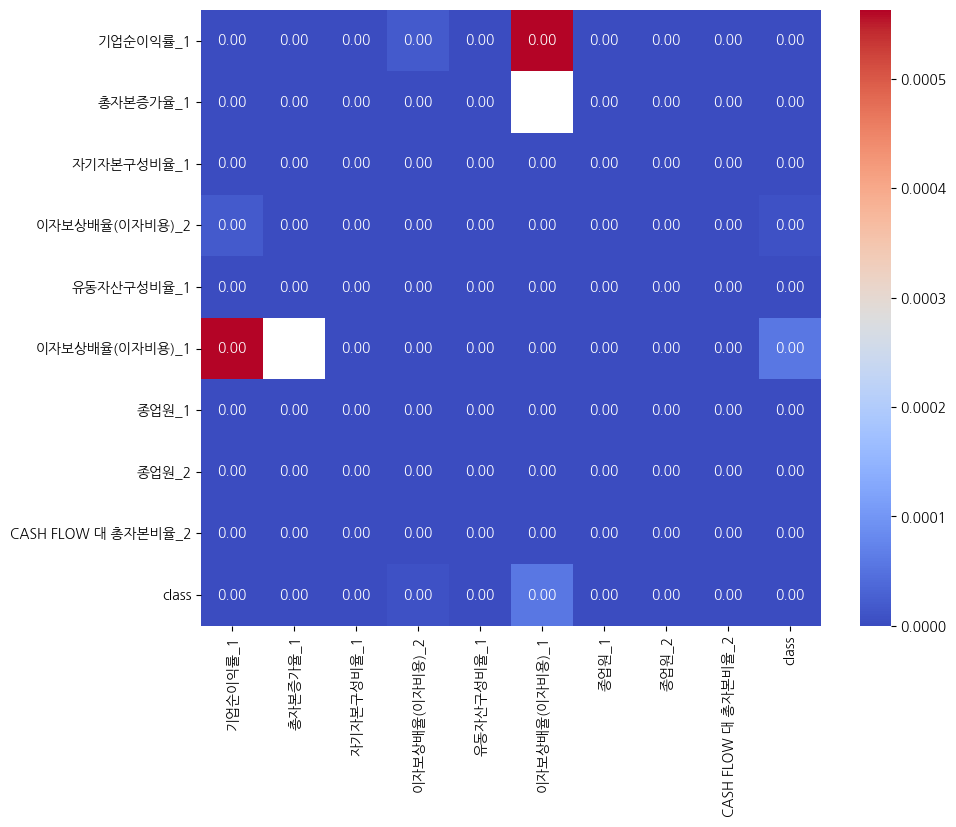

In [ ]:
# 상관관계 계산
from scipy.stats import pearsonr
corr_matrix = lp.corr()

# p-value 계산
p_values = pd.DataFrame(np.zeros_like(corr_matrix.values), columns=corr_matrix.columns, index=corr_matrix.index)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        corr, p = pearsonr(lp[corr_matrix.columns[i]], lp[corr_matrix.columns[j]])
        p_values.iloc[i, j] = p

# 시각화
plt.figure(figsize=(10, 8))  # 히트맵 크기 조정
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 8))  # 히트맵 크기 조정
sns.heatmap(p_values, annot=True, cmap='coolwarm', fmt=".2f", mask=(p_values >= 0.05))
plt.show()

## 모델 학습 및 성능 평가

##### 모델링 계획
###### 전처리
  + label 지정
  + 숫자형 데이터 MinMaxScaler
  + 범주형 데이터 Labeling
  + 데이터 분포 확인하기
  
###### 모델 설계
  + train_test_split(stratify)를 사용해서 test와 train의 레이블 분포를 맞추기
  + SMOTE방식으로 label1 (상장 기업) 수 늘리기
  + StratiftKflod로 클래스 불균형을 해소하면서 학습 시키기
  + 최종적으로 나온 모델을 test데이터를 통해 돌려보기

#### 일반

In [ ]:
### 윈터라이징 -> split -> 스케일링 -> select_Fe 거친 X_train과 X_test 변수 정리하고 시작함

X_train_se = X_train_scaled[select_fe_final]

X_test_se = X_test_scaled[select_fe_final]

test = pd.concat([X_test_se.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)


In [ ]:
X_train_se

,기업순이익률,총자본증가율,자기자본구성비율,이자보상배율(이자비용)_1,유동자산구성비율,이자보상배율(이자비용),종업원,종업원_1,CASH FLOW 대 총자본비율_1
19592,0.54,0.34,0.00,0.00,0.04,0.00,8,8,0.59
23750,0.50,0.43,0.19,1.00,0.01,1.00,0,0,0.54
2549,0.51,0.26,0.22,0.00,0.09,0.00,11,11,0.53
8484,0.57,0.35,0.83,1.00,0.27,0.00,626,626,0.62
22776,0.66,0.17,0.10,0.00,0.96,0.00,3,3,0.58
...,...,...,...,...,...,...,...,...,...
2012,0.56,0.27,0.19,0.00,0.24,0.00,4,4,0.53
16556,0.59,0.32,0.30,0.00,0.63,0.00,87,87,0.67
4183,0.99,0.21,0.22,0.00,0.25,0.00,1,1,0.51
4577,0.52,0.31,0.11,0.00,0.23,0.00,24,24,0.61


In [ ]:
def model_score(model_type, df, threshold=0.5):
    X_te = df.drop('label', axis=1)
    y_te = df['label']

    model = model_type(random_state=42, verbose=0)
    model.fit(X_train_se, y_train)
    pred_proba = model.predict_proba(X_te)[:, 1]
    pred = (pred_proba >= threshold).astype(int)

    precision = precision_score(y_te, pred)
    recall = recall_score(y_te, pred)
    accuracy = accuracy_score(y_te, pred)
    roc_auc = roc_auc_score(y_te, pred_proba)
    conf_matrix = confusion_matrix(y_te, pred)
    f1_score_value = f1_score(y_te, pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print("ROC AUC Score:", roc_auc)
    print("F1 Score:", f1_score_value)  # Use the renamed variable
    print("Confusion Matrix:")
    print(conf_matrix)
    unique_values, counts = np.unique(pred, return_counts=True)

    # Display the results
    for value, count in zip(unique_values, counts):
        print(f"{value}: {count} times")

    print(y_te.value_counts())

    sns.heatmap(conf_matrix, annot=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [ ]:

X_te = df.drop('label', axis=1)
y_te = df['label']

model = model_type(random_state=42, verbose=0)
model.fit(X_train_se, y_train)
pred_proba = model.predict_proba(X_te)[:, 1]
pred = (pred_proba >= threshold).astype(int)

precision = precision_score(y_te, pred)
recall = recall_score(y_te, pred)
accuracy = accuracy_score(y_te, pred)
roc_auc = roc_auc_score(y_te, pred_proba)
conf_matrix = confusion_matrix(y_te, pred)
f1_score_value = f1_score(y_te, pred)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1_score_value)  # Use the renamed variable
print("Confusion Matrix:")
print(conf_matrix)
unique_values, counts = np.unique(pred, return_counts=True)

# Display the results
for value, count in zip(unique_values, counts):
    print(f"{value}: {count} times")

print(y_te.value_counts())

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


TypeError: TabModel.__init__() got an unexpected keyword argument 'random_state'

In [ ]:
model_score(RandomForestClassifier, test, 0.5)

In [ ]:
model_score(LogisticRegression, test, 0.5)

Precision: 0.5449101796407185
Recall: 0.2983606557377049
Accuracy: 0.9712899712899713
ROC AUC Score: 0.9241677767439369
F1 Score: 0.385593220338983
Confusion Matrix:
[[9720   76]
 [ 214   91]]
0: 9934 times
1: 167 times
0    9796
1     305
Name: label, dtype: int64


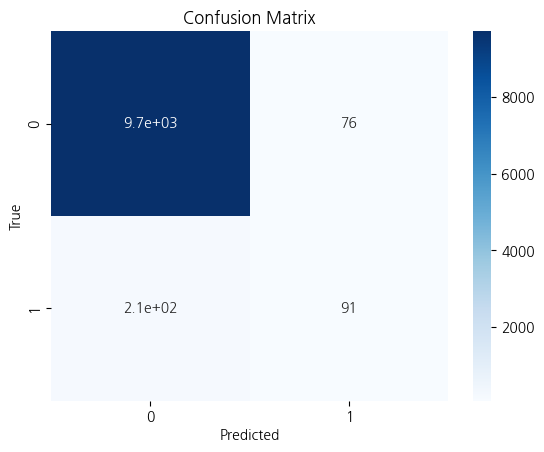

In [ ]:
model_score(XGBClassifier, test, 0.5)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
Precision: 0.6158536585365854
Recall: 0.33114754098360655
Accuracy: 0.9735669735669735
ROC AUC Score: 0.9325602956040939
F1 Score: 0.4307036247334755
Confusion Matrix:
[[9733   63]
 [ 204  101]]
0: 9937 times
1: 164 times
0    9796
1     305
Name: label, dtype: int64


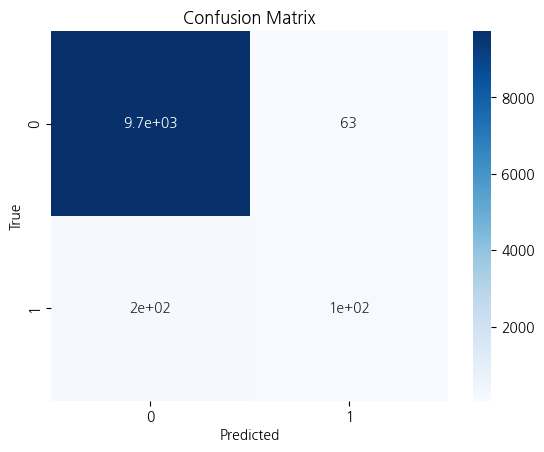

In [ ]:
model_score(LGBMClassifier, test, 0.5)

Precision: 0.6598639455782312
Recall: 0.3180327868852459
Accuracy: 0.9744579744579744
ROC AUC Score: 0.9338344858055145
F1 Score: 0.42920353982300885
Confusion Matrix:
[[9746   50]
 [ 208   97]]
0: 9954 times
1: 147 times
0    9796
1     305
Name: label, dtype: int64


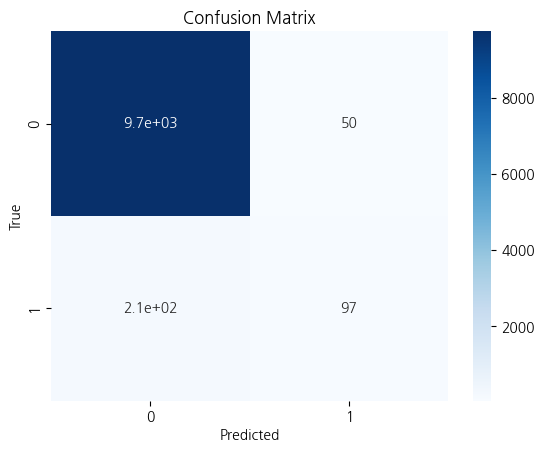

In [ ]:
model_score(CatBoostClassifier, test, 0.5)

### 하이퍼파라미터 튜닝

In [ ]:
not_scaled_x_data = X_train[select_fe]

In [ ]:
def xgboost_objective(trial):
    param_grid = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
    }

    model = XGBClassifier(**param_grid, random_state=42, verbosity=0)

    fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    scores = []
    for num, (train_idx, valid_idx) in enumerate(fold.split(X_train_se, y_train)):
        X_tr, X_val = X_train_se.iloc[train_idx], X_train_se.iloc[valid_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        model.fit(X_tr, y_tr)
        pred_proba = model.predict_proba(X_val)[:, 1]
        pred = (pred_proba >= 0.5).astype(int)

        f1_ = f1_score(y_val, pred)
        scores.append(f1_)

    return np.mean(scores)


In [ ]:
def catboost_objective(trial):
    param_grid = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'iterations': trial.suggest_int('iterations', 50, 200),
        'depth': trial.suggest_int('depth', 3, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 5),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.8, 1.0),
    }

    model = CatBoostClassifier(**param_grid, random_state=42, verbose=0)

    fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    scores = []
    for num, (train_idx, valid_idx) in enumerate(fold.split(X_train_se, y_train)):
        X_tr, X_val = X_train_se.iloc[train_idx], X_train_se.iloc[valid_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        model.fit(X_tr, y_tr, eval_set=(X_val, y_val), early_stopping_rounds=10, verbose=False)
        pred_proba = model.predict_proba(X_val)[:, 1]
        pred = (pred_proba >= 0.5).astype(int)

        f1_ = f1_score(y_val, pred)
        scores.append(f1_)

    return np.mean(scores)


In [ ]:
def lightgbm_objective(trial):
    param_grid = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 5),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
    }

    model = LGBMClassifier(**param_grid, random_state=42, silent=True)

    fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    scores = []
    for num, (train_idx, valid_idx) in enumerate(fold.split(X_train_se, y_train)):
        X_tr, X_val = X_train_se.iloc[train_idx], X_train_se.iloc[valid_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], eval_metric='f1')
        pred_proba = model.predict_proba(X_val)[:, 1]
        pred = (pred_proba >= 0.5).astype(int)

        f1_ = f1_score(y_val, pred)
        scores.append(f1_)

    return np.mean(scores)

In [ ]:
def random_forest_objective(trial):
    param_grid = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0),
    }

    model = RandomForestClassifier(**param_grid, random_state=42)

    fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    scores = []
    for num, (train_idx, valid_idx) in enumerate(fold.split(X_train_se, y_train)):
        X_tr, X_val = X_train_se.iloc[train_idx], X_train_se.iloc[valid_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        model.fit(X_tr, y_tr)
        pred_proba = model.predict_proba(X_val)[:, 1]
        pred = (pred_proba >= 0.5).astype(int)

        f1_ = f1_score(y_val, pred)
        scores.append(f1_)

    return np.mean(scores)

In [ ]:
def decision_tree_objective(trial):
    param_grid = {
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0),
    }

    model = DecisionTreeClassifier(**param_grid, random_state=42)

    fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    scores = []
    for num, (train_idx, valid_idx) in enumerate(fold.split(X_train_se, y_train)):
        X_tr, X_val = X_train_se.iloc[train_idx], X_train_se.iloc[valid_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        model.fit(X_tr, y_tr)
        pred_proba = model.predict_proba(X_val)[:, 1]
        pred = (pred_proba >= 0.5).astype(int)

        f1_ = f1_score(y_val, pred)
        scores.append(f1_)
    return np.mean(scores)

In [ ]:

def logistic_regression_objective(trial):
    param_grid = {
        'C': trial.suggest_float('C', 0.01, 10.0),
        # 'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'max_iter': trial.suggest_int('max_iter', 100, 1000),
    }

    model = LogisticRegression(**param_grid, random_state=42)

    fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    scores = []
    for num, (train_idx, valid_idx) in enumerate(fold.split(X_train_se, y_train)):
        X_tr, X_val = X_train_se.iloc[train_idx], X_train_se.iloc[valid_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        model.fit(X_tr, y_tr)
        pred_proba = model.predict_proba(X_val)[:, 1]
        pred = (pred_proba >= 0.5).astype(int)

        f1_ = f1_score(y_val, pred)
        scores.append(f1_)

    return np.mean(scores)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(decision_tree_objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best trial:', study.best_value)
# params = study.best_trial.params

[I 2024-02-17 06:26:54,374] A new study created in memory with name: no-name-bcc29130-1245-4412-a1e3-e32193db54e3
[I 2024-02-17 06:26:57,297] Trial 0 finished with value: 0.199173347273014 and parameters: {'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 0.5649879654290402}. Best is trial 0 with value: 0.199173347273014.
[I 2024-02-17 06:26:58,728] Trial 1 finished with value: 0.0 and parameters: {'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.1147215367506011}. Best is trial 0 with value: 0.199173347273014.
[I 2024-02-17 06:27:00,254] Trial 2 finished with value: 0.164989915928051 and parameters: {'max_depth': 6, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_features': 0.38452036782021326}. Best is trial 0 with value: 0.199173347273014.
[I 2024-02-17 06:27:02,689] Trial 3 finished with value: 0.17074338561566696 and parameters: {'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 1, 'max_features': 0.77210

Number of finished trials: 50
Best trial: {'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 0.5668283636148712}
Best trial: 0.22849547935016418


In [ ]:
def make_score_param(model_type, param_grid):
  X_te = test.drop('label', axis=1)
  y_te = test['label']

  model = model_type(**param_grid, random_state=42)
  model.fit(X_train_se, y_train)
  # test_pred = model.predict(xtest)
  y_test_probs = model.predict_proba(X_te)[:, 1]
  test_pred = (y_test_probs >= 0.1).astype(int)

  precision = precision_score(y_te, test_pred)
  recall = recall_score(y_te, test_pred)
  accuracy = accuracy_score(y_te, test_pred)
  conf_matrix = confusion_matrix(y_te, test_pred)
  f1_score_value = f1_score(y_te, test_pred)
  roc_auc = roc_auc_score(y_te, y_test_probs)

  print("Precision:", precision)
  print("Recall:", recall)
  print("Accuracy:", accuracy)
  print("ROC AUC Score:", roc_auc)
  print("F1 Score:", f1_score_value)  # Use the renamed variable
  print("Confusion Matrix:")
  print(conf_matrix)
  unique_values, counts = np.unique(test_pred, return_counts=True)

  # Display the results
  for value, count in zip(unique_values, counts):
      print(f"{value}: {count} times")

  print(y_te.value_counts())

  sns.heatmap(conf_matrix, annot=True, cmap='Blues')
  plt.title('혼동행렬')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

Precision: 0.3017656500802568
Recall: 0.6163934426229508
Accuracy: 0.9453519453519453
ROC AUC Score: 0.9315418136542851
F1 Score: 0.4051724137931034
Confusion Matrix:
[[9361  435]
 [ 117  188]]
0: 9478 times
1: 623 times
0    9796
1     305
Name: label, dtype: int64


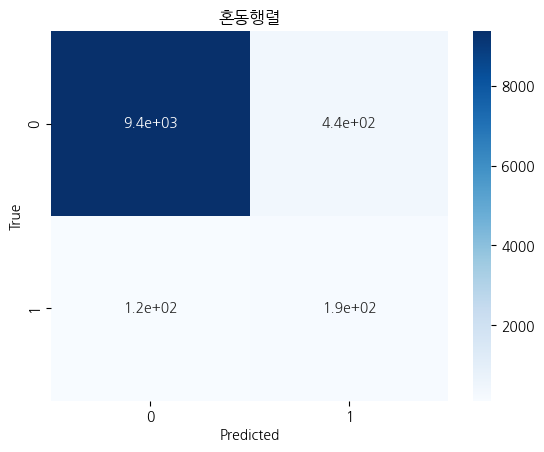

In [ ]:
make_score_param(XGBClassifier, {
    'learning_rate': 0.1376659633427028, 'n_estimators': 191, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.9165726493889653, 'colsample_bytree': 0.8579536962223269
})

0:	learn: 0.5406870	total: 5.87ms	remaining: 511ms
1:	learn: 0.4368471	total: 11.3ms	remaining: 486ms
2:	learn: 0.3612929	total: 15.7ms	remaining: 444ms
3:	learn: 0.3045885	total: 20.6ms	remaining: 432ms
4:	learn: 0.2605860	total: 24.7ms	remaining: 409ms
5:	learn: 0.2268102	total: 28.8ms	remaining: 394ms
6:	learn: 0.1991557	total: 33.1ms	remaining: 383ms
7:	learn: 0.1774794	total: 37.6ms	remaining: 376ms
8:	learn: 0.1606400	total: 41.9ms	remaining: 368ms
9:	learn: 0.1476497	total: 46.5ms	remaining: 363ms
10:	learn: 0.1356124	total: 51.1ms	remaining: 358ms
11:	learn: 0.1259537	total: 56ms	remaining: 355ms
12:	learn: 0.1180000	total: 60.5ms	remaining: 349ms
13:	learn: 0.1118390	total: 65.2ms	remaining: 345ms
14:	learn: 0.1063330	total: 70.1ms	remaining: 341ms
15:	learn: 0.1014607	total: 74.8ms	remaining: 336ms
16:	learn: 0.0979102	total: 79.2ms	remaining: 331ms
17:	learn: 0.0945938	total: 83.8ms	remaining: 326ms
18:	learn: 0.0921223	total: 88ms	remaining: 320ms
19:	learn: 0.0897768	total

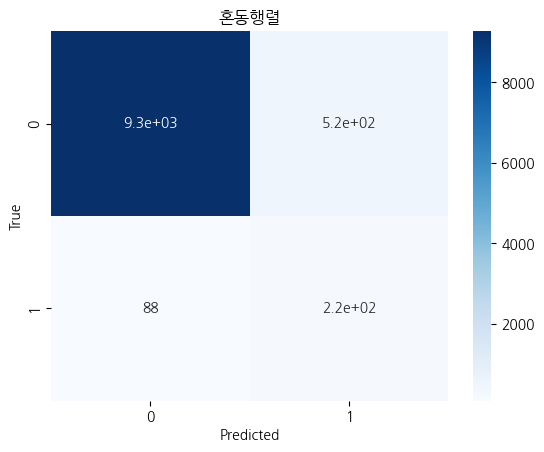

In [ ]:
make_score_param(CatBoostClassifier, {
   'learning_rate': 0.18877844296522112, 'iterations': 88, 'depth': 5, 'min_child_samples': 5, 'subsample': 0.9464765445542969, 'colsample_bylevel': 0.854020774277296
})

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 711, number of negative: 22856
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 23567, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.030169 -> initscore=-3.470297
[LightGBM] [Info] Start training from score -3.470297
Precision: 0.28021248339973437
Recall: 0.6918032786885245
Accuracy: 0.937035937035937
ROC AUC Score: 0.9330348954742316
F1 Score: 0.3988657844990548
Confusion Matrix:
[[9254  542]
 [  94  211]]
0: 9348 times
1: 753 times
0    9796
1     305
Name: label, dtype: int64


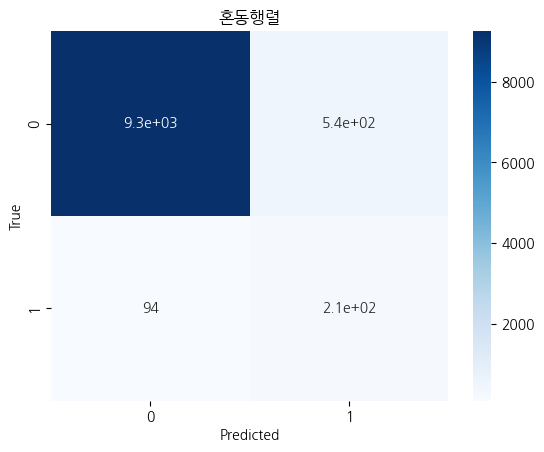

In [ ]:
make_score_param(LGBMClassifier, {
    'learning_rate': 0.11288977490136533, 'n_estimators': 174, 'max_depth': 3, 'min_child_samples': 4, 'subsample': 0.8789151275244558, 'colsample_bytree': 0.9624149079667592
})

Precision: 0.2160392798690671
Recall: 0.43278688524590164
Accuracy: 0.9354519354519355
ROC AUC Score: 0.8760370576146839
F1 Score: 0.28820960698689957
Confusion Matrix:
[[9317  479]
 [ 173  132]]
0: 9490 times
1: 611 times
0    9796
1     305
Name: label, dtype: int64


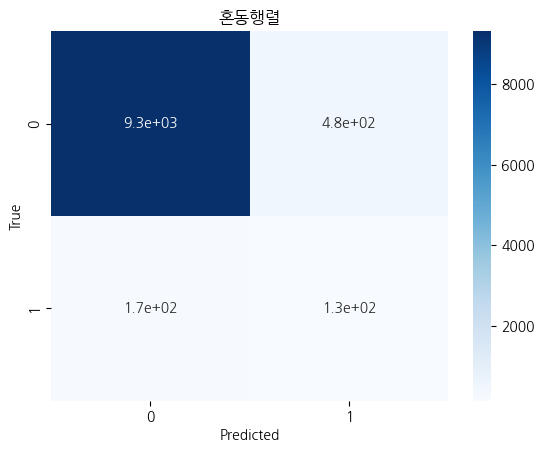

In [ ]:
make_score_param(LogisticRegression, {
    'C': 3.1236003953034577, 'max_iter': 371
})

Precision: 0.2336448598130841
Recall: 0.6557377049180327
Accuracy: 0.9246609246609246
ROC AUC Score: 0.8988856274558368
F1 Score: 0.3445305770887166
Confusion Matrix:
[[9140  656]
 [ 105  200]]
0: 9245 times
1: 856 times
0    9796
1     305
Name: label, dtype: int64


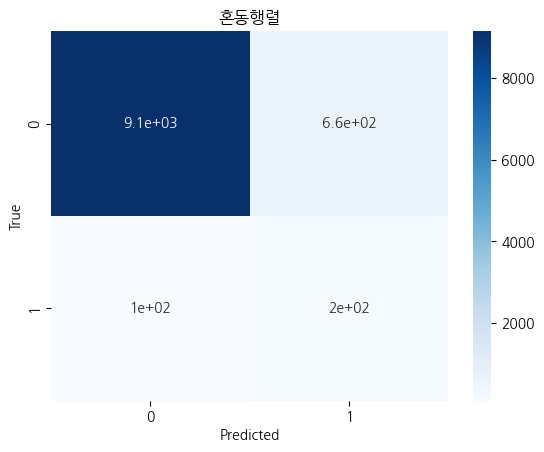

In [ ]:
make_score_param(DecisionTreeClassifier, {
    'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 0.5668283636148712
})

Precision: 0.22896698615548455
Recall: 0.7049180327868853
Accuracy: 0.9194139194139194
ROC AUC Score: 0.9232364832752078
F1 Score: 0.34565916398713825
Confusion Matrix:
[[9072  724]
 [  90  215]]
0: 9162 times
1: 939 times
0    9796
1     305
Name: label, dtype: int64


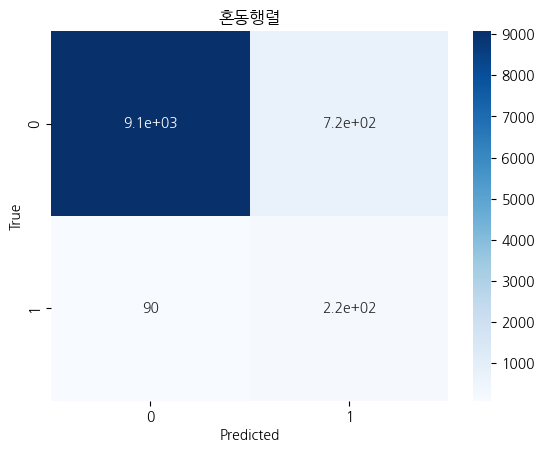

In [ ]:
make_score_param(RandomForestClassifier, {
    'n_estimators': 120, 'max_depth': 7, 'min_samples_split': 13, 'min_samples_leaf': 4, 'max_features': 0.8193530155371512
})

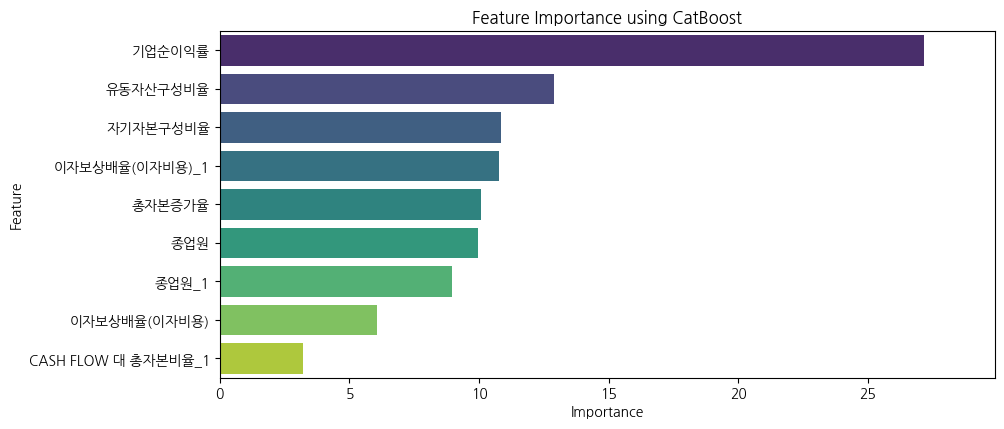

In [ ]:
params_select = {'learning_rate': 0.18877844296522112, 'iterations': 88, 'depth': 5, 'min_child_samples': 5, 'subsample': 0.9464765445542969, 'colsample_bylevel': 0.854020774277296}
model = CatBoostClassifier(random_state=42, verbose=0, **params_select)
model.fit(X_train_se, y_train)
# 특성 중요도 추출
importance = model.feature_importances_

# 특성 중요도와 특성 이름을 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({'Feature': X_train[select_fe_final].columns, 'Importance': importance})

# 중요도에 따라 내림차순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 그래프 크기 조정
plt.figure(figsize=(10, len(feature_importance_df) * 0.5))

# Seaborn을 사용한 그래프 그리기
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# 특정 값의 범위를 제한 (예: 상위 15개의 특성만 표시)
plt.xlim(0, feature_importance_df['Importance'].iloc[:15].max() * 1.1)

plt.title('Feature Importance using CatBoost')
plt.show()


## 리샘플링

### 일반

In [ ]:
df2 = X_train_se.copy()
df2['label'] = y_train

In [ ]:
df2

,기업순이익률,총자본증가율,자기자본구성비율,이자보상배율(이자비용)_1,유동자산구성비율,이자보상배율(이자비용),종업원,종업원_1,CASH FLOW 대 총자본비율_1,label
19592,0.54,0.34,0.00,0.00,0.04,0.00,8,8,0.59,0
23750,0.50,0.43,0.19,1.00,0.01,1.00,0,0,0.54,0
2549,0.51,0.26,0.22,0.00,0.09,0.00,11,11,0.53,0
8484,0.57,0.35,0.83,1.00,0.27,0.00,626,626,0.62,0
22776,0.66,0.17,0.10,0.00,0.96,0.00,3,3,0.58,0
...,...,...,...,...,...,...,...,...,...,...
2012,0.56,0.27,0.19,0.00,0.24,0.00,4,4,0.53,0
16556,0.59,0.32,0.30,0.00,0.63,0.00,87,87,0.67,0
4183,0.99,0.21,0.22,0.00,0.25,0.00,1,1,0.51,0
4577,0.52,0.31,0.11,0.00,0.23,0.00,24,24,0.61,0


In [ ]:
# # 모델설정
# sm = SMOTEENN(sampling_strategy=0.5, random_state=42)

# # train 데이터를 넣어 복제함
# X_resampled, y_resampled = sm.fit_resample(X, y)

# print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(X_resampled.shape))

# y_resampled = pd.DataFrame(y_resampled)
# print(f'오버샘플링 이후 클래스 분포 \n {y_resampled.value_counts()}')

After OverSampling, the shape of train_X: (30341, 9)
After OverSampling, the shape of train_y: (30341, 9) 

오버샘플링 이후 클래스 분포 
 label
0        20143
1        10198
dtype: int64


In [ ]:
# 모델설정
X = df2.drop('label', axis=1)
y = df2['label']
sm = SMOTE(sampling_strategy=0.4, random_state=42)

# train데이터를 넣어 복제함
X_resampled, y_resampled = sm.fit_resample(X, y)

print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(X_resampled.shape))

# # 모델설정
# sm = SMOTE(sampling_strategy=0.5, random_state=42)

# # train데이터를 넣어 복제함
# X_resampled, y_resampled = sm.fit_resample(x_train, y_train)

# print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(X_resampled.shape))


y_resampled = pd.DataFrame(y_resampled)
print(f'오버샘플링 이후 클래스 분포 \n {y_resampled.value_counts()}')

After OverSampling, the shape of train_X: (29712, 9)
After OverSampling, the shape of train_y: (29712, 9) 

오버샘플링 이후 클래스 분포 
 label
0        22856
1         6856
dtype: int64


In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

# # 모델 설정
# X = df2.drop('label', axis=1)
# y = df2['label']

# # 언더샘플링을 위해 RandomUnderSampler를 사용
# rus = RandomUnderSampler(sampling_strategy=0.5, random_state=42)

# # 언더샘플링을 적용하여 데이터를 줄임
# X_resampled, y_resampled = rus.fit_resample(X, y)

# print('After UnderSampling, the shape of train_X: {}'.format(X_resampled.shape))
# print('After UnderSampling, the shape of train_y: {} \n'.format(X_resampled.shape))

# y_resampled = pd.DataFrame(y_resampled)
# print(f'언더샘플링 이후 클래스 분포 \n {y_resampled.value_counts()}')

After UnderSampling, the shape of train_X: (2133, 9)
After UnderSampling, the shape of train_y: (2133, 9) 

언더샘플링 이후 클래스 분포 
 label
0        1422
1         711
dtype: int64


In [ ]:
def resampled_model_score(model_type, threshold=0.5):

    X_te = X_test_se
    y_te = y_test

    # X_te_re = X_resampled
    # y_te_re = y_resampled
    # print(len(X_te_re))
    print(y_resampled.value_counts())

    model = model_type(random_state=42)
    model.fit(X_resampled, y_resampled)
    pred_proba = model.predict_proba(X_te)[:, 1]
    pred = (pred_proba >= threshold).astype(int)
    print(len(y_test))
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    conf_matrix = confusion_matrix(y_test, pred)
    f1_score_value = f1_score(y_test, pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print("ROC AUC Score:", roc_auc)
    print("F1 Score:", f1_score_value)  # Use the renamed variable
    print("Confusion Matrix:")
    print(conf_matrix)
    unique_values, counts = np.unique(pred, return_counts=True)

    # Display the results
    for value, count in zip(unique_values, counts):
        print(f"{value}: {count} times")

    print(y_test.value_counts())

    sns.heatmap(conf_matrix, annot=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


label
0        1422
1         711
dtype: int64
10101
Precision: 0.42028985507246375
Recall: 0.28524590163934427
Accuracy: 0.9665379665379665
ROC AUC Score: 0.9261921895186394
F1 Score: 0.33984375
Confusion Matrix:
[[9676  120]
 [ 218   87]]
0: 9894 times
1: 207 times
0    9796
1     305
Name: label, dtype: int64


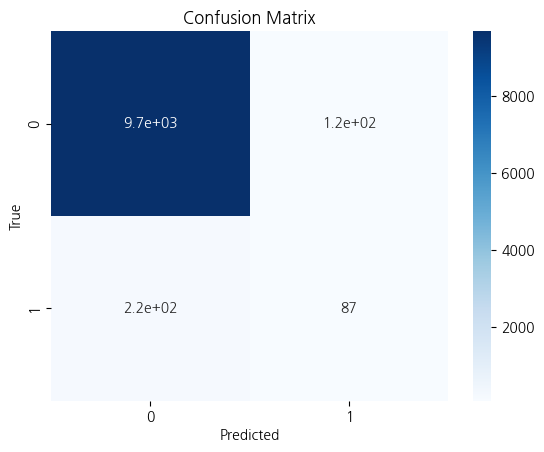

In [ ]:
resampled_model_score(RandomForestClassifier, 0.9)

label
0        1422
1         711
dtype: int64
10101
Precision: 0.21957040572792363
Recall: 0.3016393442622951
Accuracy: 0.9465399465399466
ROC AUC Score: 0.8763734277624189
F1 Score: 0.2541436464088398
Confusion Matrix:
[[9469  327]
 [ 213   92]]
0: 9682 times
1: 419 times
0    9796
1     305
Name: label, dtype: int64


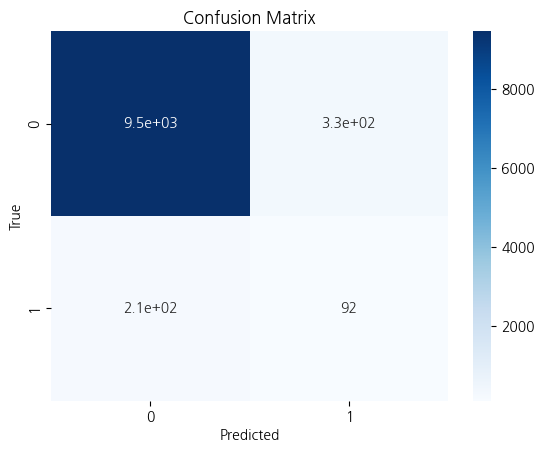

In [ ]:
resampled_model_score(LogisticRegression, 0.8)

label
0        1422
1         711
dtype: int64
10101
Precision: 0.36225596529284165
Recall: 0.5475409836065573
Accuracy: 0.9572319572319572
ROC AUC Score: 0.9326335941736005
F1 Score: 0.43603133159268925
Confusion Matrix:
[[9502  294]
 [ 138  167]]
0: 9640 times
1: 461 times
0    9796
1     305
Name: label, dtype: int64


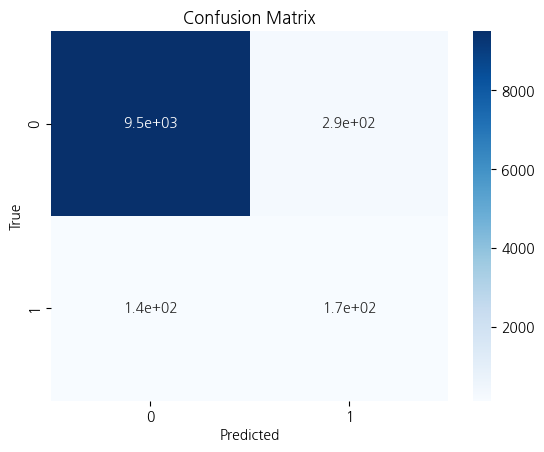

In [ ]:
resampled_model_score(XGBClassifier, 0.95)

label
0        1422
1         711
dtype: int64
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 711, number of negative: 1422
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000485 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2133, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
10101
Precision: 0.3595959595959596
Recall: 0.5836065573770491
Accuracy: 0.9560439560439561
ROC AUC Score: 0.9326349329602581
F1 Score: 0.44499999999999995
Confusion Matrix:
[[9479  317]
 [ 127  178]]
0: 9606 times
1: 495 times
0    9796
1     305
Name: label, dtype: int64


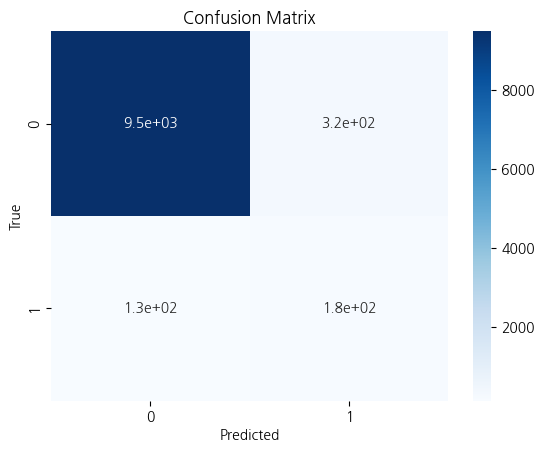

In [ ]:
resampled_model_score(LGBMClassifier, 0.9)

label
0        1422
1         711
dtype: int64
Learning rate set to 0.014237
0:	learn: 0.6790853	total: 17.6ms	remaining: 17.5s
1:	learn: 0.6642471	total: 28.1ms	remaining: 14s
2:	learn: 0.6510336	total: 37.1ms	remaining: 12.3s
3:	learn: 0.6387716	total: 46.8ms	remaining: 11.7s
4:	learn: 0.6264245	total: 64ms	remaining: 12.7s
5:	learn: 0.6143062	total: 75.5ms	remaining: 12.5s
6:	learn: 0.6032947	total: 83.9ms	remaining: 11.9s
7:	learn: 0.5927146	total: 90.5ms	remaining: 11.2s
8:	learn: 0.5820916	total: 100ms	remaining: 11s
9:	learn: 0.5733555	total: 111ms	remaining: 11s
10:	learn: 0.5623819	total: 126ms	remaining: 11.3s
11:	learn: 0.5532183	total: 139ms	remaining: 11.4s
12:	learn: 0.5437855	total: 152ms	remaining: 11.5s
13:	learn: 0.5355414	total: 159ms	remaining: 11.2s
14:	learn: 0.5274555	total: 171ms	remaining: 11.3s
15:	learn: 0.5197552	total: 180ms	remaining: 11.1s
16:	learn: 0.5130187	total: 192ms	remaining: 11.1s
17:	learn: 0.5057441	total: 202ms	remaining: 11s
18:	learn: 0.4984

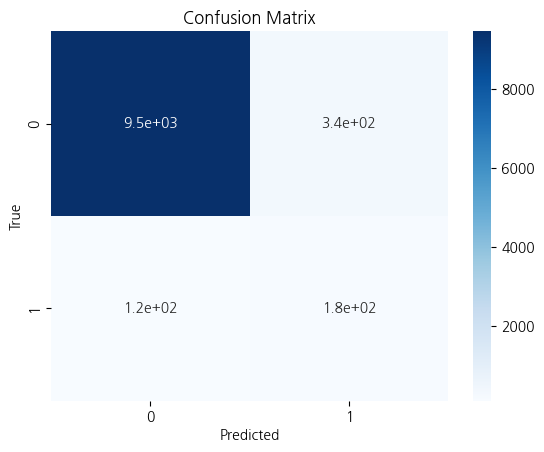

In [ ]:
resampled_model_score(CatBoostClassifier, 0.8)

label
0        1422
1         711
dtype: int64
10101
Precision: 0.13064133016627077
Recall: 0.7213114754098361
Accuracy: 0.8466488466488467
ROC AUC Score: 0.7872545836708191
F1 Score: 0.2212166918049271
Confusion Matrix:
[[8332 1464]
 [  85  220]]
0: 8417 times
1: 1684 times
0    9796
1     305
Name: label, dtype: int64


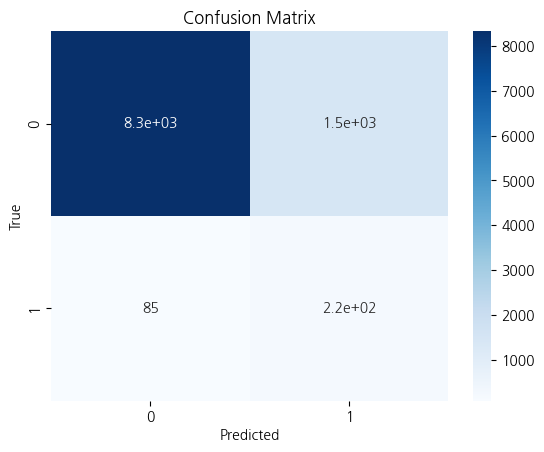

In [ ]:
resampled_model_score(DecisionTreeClassifier, 1)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# XGBoost 모델 설정
xgb_model = xgb.XGBClassifier()

# 그리드 서치를 위한 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# 언더샘플링을 적용한 데이터를 그리드 서치에 적용
grid_search.fit(X_resampled, y_resampled)

# 최적의 하이퍼파라미터 및 평가 지표 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# 최적의 모델을 사용하여 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 테스트 세트에 대한 정확도 및 분류 보고서 출력
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report

# # XGBoost 모델 설정
# xgb_model = xgb.XGBClassifier()

# # 그리드 서치를 위한 파라미터 그리드 설정
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2]
# }

# # 그리드 서치 객체 생성
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# # 언더샘플링을 적용한 데이터를 그리드 서치에 적용
# grid_search.fit(X_resampled, y_resampled)

# # 최적의 하이퍼파라미터 및 평가 지표 출력
# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy Score:", grid_search.best_score_)

# # 최적의 모델을 사용하여 예측
# best_model = grid_search.best_estimator_

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Accuracy Score: 0.8902733671102923


10101
Precision: 0.3944020356234097
Recall: 0.5081967213114754
Accuracy: 0.9615879615879616
ROC AUC Score: 0.9346645335332588
F1 Score: 0.4441260744985674
Confusion Matrix:
[[9558  238]
 [ 150  155]]
0: 9708 times
1: 393 times
0    9796
1     305
Name: label, dtype: int64


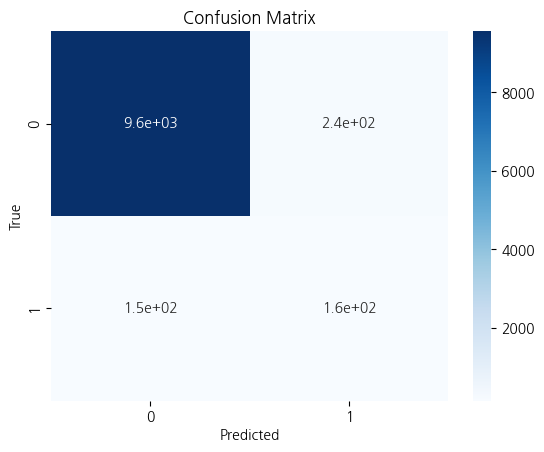

In [ ]:
# X_te = X_test_se
# y_te = y_test
# # best_model.fit(X_resampled, y_resampled)
# pred_proba = best_model.predict_proba(X_te)[:, 1]
# pred = (pred_proba >= 0.8).astype(int)
# print(len(y_test))
# precision = precision_score(y_test, pred)
# recall = recall_score(y_test, pred)
# accuracy = accuracy_score(y_test, pred)
# roc_auc = roc_auc_score(y_test, pred_proba)
# conf_matrix = confusion_matrix(y_test, pred)
# f1_score_value = f1_score(y_test, pred)

# print("Precision:", precision)
# print("Recall:", recall)
# print("Accuracy:", accuracy)
# print("ROC AUC Score:", roc_auc)
# print("F1 Score:", f1_score_value)  # Use the renamed variable
# print("Confusion Matrix:")
# print(conf_matrix)
# unique_values, counts = np.unique(pred, return_counts=True)

# # Display the results
# for value, count in zip(unique_values, counts):
#     print(f"{value}: {count} times")

# print(y_test.value_counts())

# sns.heatmap(conf_matrix, annot=True, cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

### 하이퍼파라미터 튜닝

In [ ]:
def xgboost_objective_resample(trial):
    param_grid = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
    }

    model = XGBClassifier(**param_grid, random_state=42, verbosity=0)

    fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    scores = []
    for num, (train_idx, valid_idx) in enumerate(fold.split(X_resampled, y_resampled)):
        X_tr, X_val = X_resampled.iloc[train_idx], X_resampled.iloc[valid_idx]
        y_tr, y_val = y_resampled.iloc[train_idx], y_resampled.iloc[valid_idx]

        model.fit(X_tr, y_tr)
        pred_proba = model.predict_proba(X_val)[:, 1]
        pred = (pred_proba >= 0.5).astype(int)

        f1_ = f1_score(y_val, pred)
        scores.append(f1_)

    return np.mean(scores)


In [ ]:
def catboost_objective_resample(trial):
    param_grid = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'iterations': trial.suggest_int('iterations', 50, 200),
        'depth': trial.suggest_int('depth', 3, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 5),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.8, 1.0),
    }

    model = CatBoostClassifier(**param_grid, random_state=42, verbose=0)

    fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    scores = []
    for num, (train_idx, valid_idx) in enumerate(fold.split(X_resampled, y_resampled)):
        X_tr, X_val = X_resampled.iloc[train_idx], X_resampled.iloc[valid_idx]
        y_tr, y_val = y_resampled.iloc[train_idx], y_resampled.iloc[valid_idx]

        model.fit(X_tr, y_tr, eval_set=(X_val, y_val), early_stopping_rounds=10, verbose=False)
        pred_proba = model.predict_proba(X_val)[:, 1]
        pred = (pred_proba >= 0.5).astype(int)

        f1_ = f1_score(y_val, pred)
        scores.append(f1_)

    return np.mean(scores)


In [ ]:
def lightgbm_objective_resample(trial):
    param_grid = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 5),
        'subsample': trial.suggest_float('subsample', 0.8, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.8, 1.0),
    }

    model = LGBMClassifier(**param_grid, random_state=42, silent=True)

    fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    scores = []
    for num, (train_idx, valid_idx) in enumerate(fold.split(X_resampled, y_resampled)):
        X_tr, X_val = X_resampled.iloc[train_idx], X_resampled.iloc[valid_idx]
        y_tr, y_val = y_resampled.iloc[train_idx], y_resampled.iloc[valid_idx]

        model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], eval_metric='f1')
        pred_proba = model.predict_proba(X_val)[:, 1]
        pred = (pred_proba >= 0.5).astype(int)

        f1_ = f1_score(y_val, pred)
        scores.append(f1_)

    return np.mean(scores)

In [ ]:
def random_forest_objective_resample(trial):
    param_grid = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0),
    }

    model = RandomForestClassifier(**param_grid, random_state=42)

    fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    scores = []
    for num, (train_idx, valid_idx) in enumerate(fold.split(X_resampled, y_resampled)):
        X_tr, X_val = X_resampled.iloc[train_idx], X_resampled.iloc[valid_idx]
        y_tr, y_val = y_resampled.iloc[train_idx], y_resampled.iloc[valid_idx]

        model.fit(X_tr, y_tr)
        pred_proba = model.predict_proba(X_val)[:, 1]
        pred = (pred_proba >= 0.5).astype(int)

        f1_ = f1_score(y_val, pred)
        scores.append(f1_)

    return np.mean(scores)

In [ ]:
def decision_tree_objective_resample(trial):
    param_grid = {
        'max_depth': trial.suggest_int('max_depth', 3, 7),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_float('max_features', 0.1, 1.0),
    }

    model = DecisionTreeClassifier(**param_grid, random_state=42)

    fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    scores = []
    for num, (train_idx, valid_idx) in enumerate(fold.split(X_resampled, y_resampled)):
        X_tr, X_val = X_resampled.iloc[train_idx], X_resampled.iloc[valid_idx]
        y_tr, y_val = y_resampled.iloc[train_idx], y_resampled.iloc[valid_idx]

        model.fit(X_tr, y_tr)
        pred_proba = model.predict_proba(X_val)[:, 1]
        pred = (pred_proba >= 0.5).astype(int)

        f1_ = f1_score(y_val, pred)
        scores.append(f1_)
    return np.mean(scores)

In [ ]:
def logistic_regression_objective_resample(trial):
    param_grid = {
        'C': trial.suggest_float('C', 0.01, 10.0),
        # 'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'max_iter': trial.suggest_int('max_iter', 100, 1000),
    }

    model = LogisticRegression(**param_grid, random_state=42)

    fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    scores = []
    for num, (train_idx, valid_idx) in enumerate(fold.split(X_resampled, y_resampled)):
        X_tr, X_val = X_resampled.iloc[train_idx], X_resampled.iloc[valid_idx]
        y_tr, y_val = y_resampled.iloc[train_idx], y_resampled.iloc[valid_idx]

        model.fit(X_tr, y_tr)
        pred_proba = model.predict_proba(X_val)[:, 1]
        pred = (pred_proba >= 0.5).astype(int)
        f1_ = f1_score(y_val, pred)
        scores.append(f1_)

    return np.mean(scores)

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(xgboost_objective_resample, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best trial:', study.best_value)

[I 2024-02-20 21:52:31,090] A new study created in memory with name: no-name-d7b811d1-0454-4fc0-93f3-fe47e39b0984
[I 2024-02-20 21:52:39,205] Trial 0 finished with value: 0.801611407417553 and parameters: {'learning_rate': 0.18675057756410252, 'n_estimators': 63, 'max_depth': 7, 'min_child_weight': 4, 'subsample': 0.9290376387409015, 'colsample_bytree': 0.9918243458121128}. Best is trial 0 with value: 0.801611407417553.
[I 2024-02-20 21:52:44,758] Trial 1 finished with value: 0.804936953896289 and parameters: {'learning_rate': 0.11587663320237121, 'n_estimators': 55, 'max_depth': 6, 'min_child_weight': 5, 'subsample': 0.874849036192086, 'colsample_bytree': 0.9147168632661792}. Best is trial 1 with value: 0.804936953896289.
[I 2024-02-20 21:52:50,816] Trial 2 finished with value: 0.7944780225142255 and parameters: {'learning_rate': 0.14784947369181448, 'n_estimators': 166, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.9638646375270776, 'colsample_bytree': 0.9592315759038826}. Be

Number of finished trials: 50
Best trial: {'learning_rate': 0.16691396312027973, 'n_estimators': 63, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.9063500553405022, 'colsample_bytree': 0.8478995970031279}
Best trial: 0.8093165699342342


### 오버샘플링 결과값

In [ ]:
def make_score_param_resample(model_type, param_grid):
  X_te = test.drop('label', axis=1)
  y_te = test['label']

  model = model_type(**param_grid, random_state=42)
  model.fit(X_resampled, y_resampled)
  # test_pred = model.predict(xtest)
  y_test_probs = model.predict_proba(X_te)[:, 1]
  test_pred = (y_test_probs >= 0.9).astype(int)


  precision = precision_score(y_te, test_pred)
  recall = recall_score(y_te, test_pred)
  accuracy = accuracy_score(y_te, test_pred)
  conf_matrix = confusion_matrix(y_te, test_pred)
  f1_score_value = f1_score(y_te, test_pred)
  roc_auc = roc_auc_score(y_te, y_test_probs)

  print("Precision:", precision)
  print("Recall:", recall)
  print("Accuracy:", accuracy)
  print("ROC AUC Score:", roc_auc)
  print("F1 Score:", f1_score_value)  # Use the renamed variable
  print("Confusion Matrix:")
  print(conf_matrix)
  unique_values, counts = np.unique(test_pred, return_counts=True)

  # Display the results
  for value, count in zip(unique_values, counts):
      print(f"{value}: {count} times")

  print(y_te.value_counts())

  sns.heatmap(conf_matrix, annot=True, cmap='Blues')
  plt.title('혼동행렬')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

Precision: 0.510752688172043
Recall: 0.3114754098360656
Accuracy: 0.9702009702009702
ROC AUC Score: 0.9202752545368132
F1 Score: 0.3869653767820774
Confusion Matrix:
[[9705   91]
 [ 210   95]]
0: 9915 times
1: 186 times
0    9796
1     305
Name: label, dtype: int64


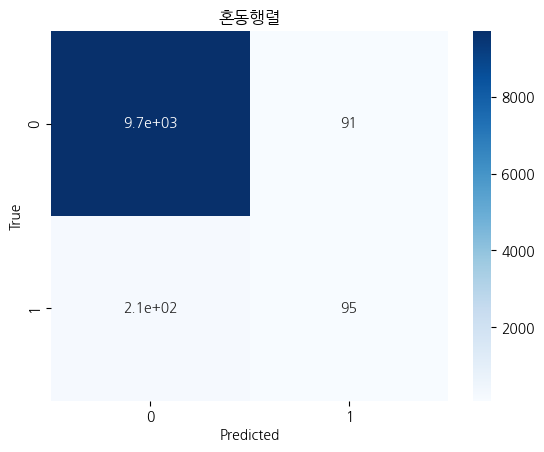

In [ ]:
make_score_param_resample(XGBClassifier, {
    'learning_rate': 0.1854716331618597, 'n_estimators': 188, 'max_depth': 7, 'min_child_weight': 2, 'subsample': 0.9748287894247206, 'colsample_bytree': 0.8571569215868889
})

0:	learn: 0.4963744	total: 43.2ms	remaining: 8.61s
1:	learn: 0.3780123	total: 62.1ms	remaining: 6.15s
2:	learn: 0.3220981	total: 78.9ms	remaining: 5.18s
3:	learn: 0.2892701	total: 95.1ms	remaining: 4.66s
4:	learn: 0.2676210	total: 112ms	remaining: 4.37s
5:	learn: 0.2528962	total: 129ms	remaining: 4.16s
6:	learn: 0.2421124	total: 145ms	remaining: 4s
7:	learn: 0.2338962	total: 165ms	remaining: 3.96s
8:	learn: 0.2278060	total: 182ms	remaining: 3.87s
9:	learn: 0.2223318	total: 199ms	remaining: 3.79s
10:	learn: 0.2171711	total: 217ms	remaining: 3.73s
11:	learn: 0.2125021	total: 236ms	remaining: 3.69s
12:	learn: 0.2097251	total: 251ms	remaining: 3.62s
13:	learn: 0.2061267	total: 269ms	remaining: 3.58s
14:	learn: 0.2026686	total: 286ms	remaining: 3.52s
15:	learn: 0.2002036	total: 303ms	remaining: 3.48s
16:	learn: 0.1976074	total: 324ms	remaining: 3.49s
17:	learn: 0.1957578	total: 340ms	remaining: 3.44s
18:	learn: 0.1939403	total: 358ms	remaining: 3.41s
19:	learn: 0.1922762	total: 375ms	remain

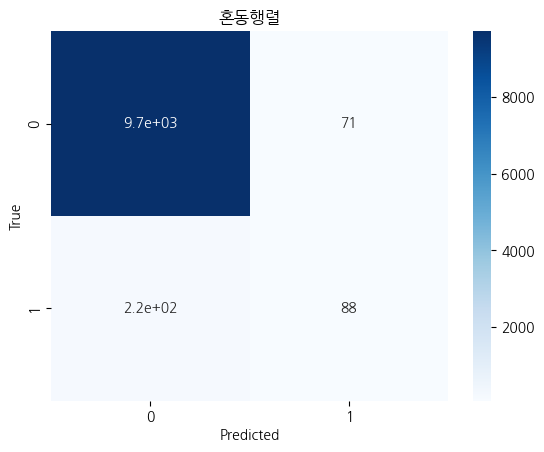

In [ ]:
make_score_param_resample(CatBoostClassifier, {
    'learning_rate': 0.1882960971404196, 'iterations': 200, 'depth': 7, 'min_child_samples': 1, 'subsample': 0.8972747167012467, 'colsample_bylevel': 0.916931690958365
})

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 9142, number of negative: 22856
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 31998, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.285705 -> initscore=-0.916334
[LightGBM] [Info] Start training from score -0.916334
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Precision: 0.5280898876404494
Recall: 

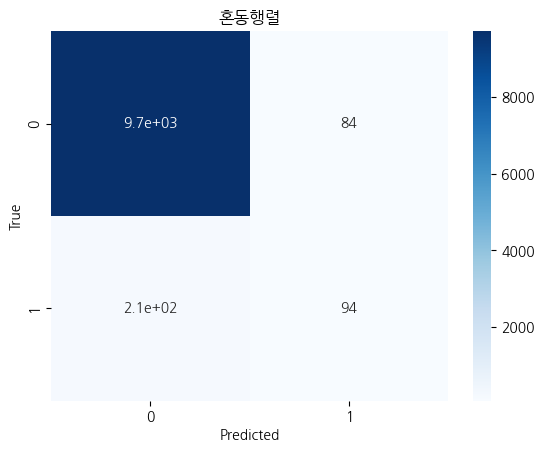

In [ ]:
make_score_param_resample(LGBMClassifier, {
    'learning_rate': 0.1996347737278885, 'n_estimators': 190, 'max_depth': 7, 'min_child_samples': 5, 'subsample': 0.9234586484384226, 'colsample_bytree': 0.8211984721645279
})

Precision: 0.5208333333333334
Recall: 0.16393442622950818
Accuracy: 0.9702009702009702
ROC AUC Score: 0.9237258097985797
F1 Score: 0.24937655860349126
Confusion Matrix:
[[9750   46]
 [ 255   50]]
0: 10005 times
1: 96 times
0    9796
1     305
Name: label, dtype: int64


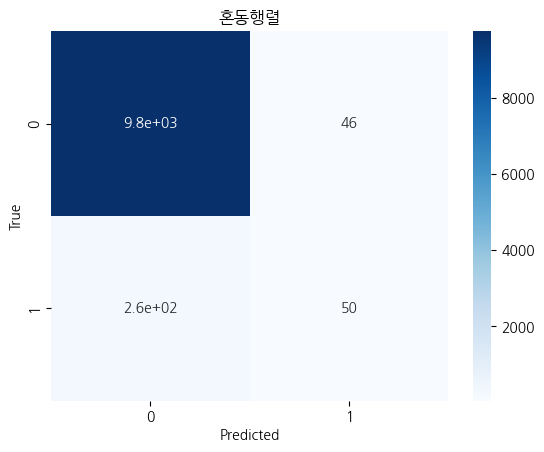

In [ ]:
make_score_param_resample(RandomForestClassifier, {
    'n_estimators': 200, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 0.7833379035023933
})

Precision: 0.3188405797101449
Recall: 0.36065573770491804
Accuracy: 0.9574299574299574
ROC AUC Score: 0.8841989704730603
F1 Score: 0.3384615384615384
Confusion Matrix:
[[9561  235]
 [ 195  110]]
0: 9756 times
1: 345 times
0    9796
1     305
Name: label, dtype: int64


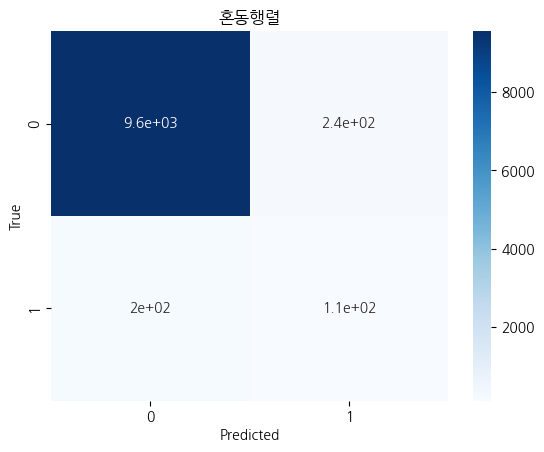

In [ ]:
make_score_param_resample(DecisionTreeClassifier, {
    'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 0.9913775906893642
})

Precision: 0.3062200956937799
Recall: 0.2098360655737705
Accuracy: 0.9617859617859618
ROC AUC Score: 0.8752926922330291
F1 Score: 0.2490272373540856
Confusion Matrix:
[[9651  145]
 [ 241   64]]
0: 9892 times
1: 209 times
0    9796
1     305
Name: label, dtype: int64


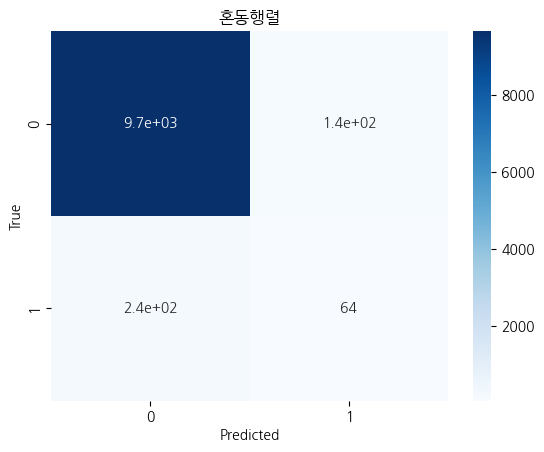

In [ ]:
make_score_param_resample(LogisticRegression, {
    'C': 7.630402906988952, 'max_iter': 448
})

Precision: 0.6451612903225806
Recall: 0.5217391304347826
Accuracy: 0.9739670643920718
ROC AUC Score: 0.9555302075381257
F1 Score: 0.5769230769230769
Confusion Matrix:
[[9697   99]
 [ 165  180]]
0: 9862 times
1: 279 times
0    9796
1     345
Name: label, dtype: int64


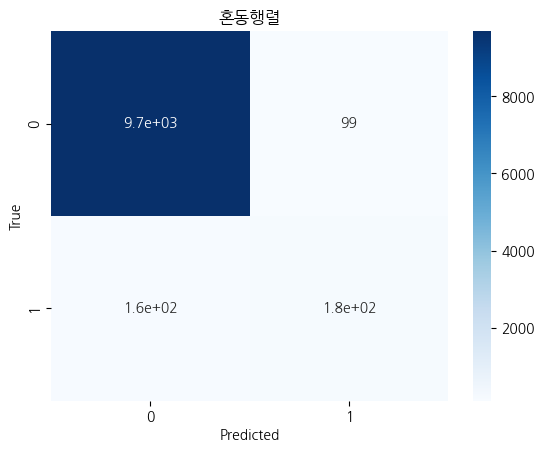

In [ ]:
X_te = test.drop('label', axis=1)
y_te = test['label']
param_grid = {
    'learning_rate': 0.1998361843261015, 'n_estimators': 182, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.8152297901852169, 'colsample_bytree': 0.973058106891242
}

model = XGBClassifier(**param_grid, random_state=42)
model.fit(X_resampled, y_resampled)
# test_pred = model.predict(xtest)
y_test_probs = model.predict_proba(X_te)[:, 1]
test_pred = (y_test_probs >= 0.5).astype(int)


precision = precision_score(y_te, test_pred)
recall = recall_score(y_te, test_pred)
accuracy = accuracy_score(y_te, test_pred)
conf_matrix = confusion_matrix(y_te, test_pred)
f1_score_value = f1_score(y_te, test_pred)
roc_auc = roc_auc_score(y_te, y_test_probs)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1_score_value)  # Use the renamed variable
print("Confusion Matrix:")
print(conf_matrix)
unique_values, counts = np.unique(test_pred, return_counts=True)

# Display the results
for value, count in zip(unique_values, counts):
    print(f"{value}: {count} times")

print(y_te.value_counts())

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('혼동행렬')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

0:	learn: 0.4463200	total: 39.2ms	remaining: 7.79s
1:	learn: 0.3242510	total: 80.2ms	remaining: 7.94s
2:	learn: 0.2596339	total: 121ms	remaining: 7.92s
3:	learn: 0.2278267	total: 158ms	remaining: 7.73s
4:	learn: 0.2063999	total: 199ms	remaining: 7.76s
5:	learn: 0.1921779	total: 246ms	remaining: 7.94s
6:	learn: 0.1822179	total: 282ms	remaining: 7.76s
7:	learn: 0.1732662	total: 317ms	remaining: 7.61s
8:	learn: 0.1670534	total: 360ms	remaining: 7.64s
9:	learn: 0.1618397	total: 403ms	remaining: 7.66s
10:	learn: 0.1584171	total: 440ms	remaining: 7.56s
11:	learn: 0.1545925	total: 476ms	remaining: 7.45s
12:	learn: 0.1511045	total: 534ms	remaining: 7.68s
13:	learn: 0.1477495	total: 596ms	remaining: 7.92s
14:	learn: 0.1448319	total: 664ms	remaining: 8.19s
15:	learn: 0.1405710	total: 725ms	remaining: 8.34s
16:	learn: 0.1376442	total: 804ms	remaining: 8.66s
17:	learn: 0.1350491	total: 893ms	remaining: 9.03s
18:	learn: 0.1331789	total: 954ms	remaining: 9.09s
19:	learn: 0.1309391	total: 1.04s	remai

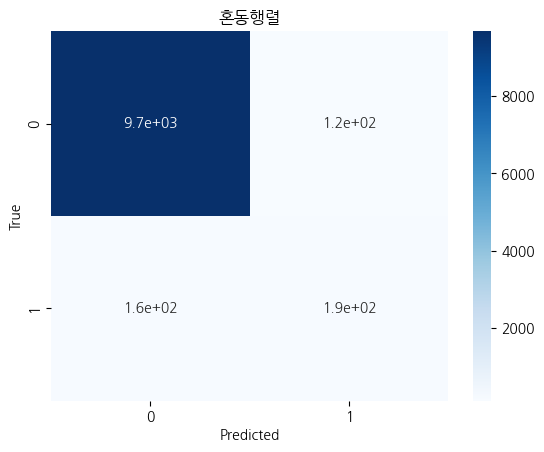

In [ ]:
X_te = test.drop('label', axis=1)
y_te = test['label']
param_grid = {
   'learning_rate': 0.19251176157858185, 'iterations': 200, 'depth': 7, 'min_child_samples': 5, 'subsample': 0.8026166712632623, 'colsample_bylevel': 0.9730062168597597
}

model = CatBoostClassifier(**param_grid, random_state=42)
model.fit(X_resampled, y_resampled)
# test_pred = model.predict(xtest)
y_test_probs = model.predict_proba(X_te)[:, 1]
test_pred = (y_test_probs >= 0.5).astype(int)


precision = precision_score(y_te, test_pred)
recall = recall_score(y_te, test_pred)
accuracy = accuracy_score(y_te, test_pred)
conf_matrix = confusion_matrix(y_te, test_pred)
f1_score_value = f1_score(y_te, test_pred)
roc_auc = roc_auc_score(y_te, y_test_probs)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1_score_value)  # Use the renamed variable
print("Confusion Matrix:")
print(conf_matrix)
unique_values, counts = np.unique(test_pred, return_counts=True)

# Display the results
for value, count in zip(unique_values, counts):
    print(f"{value}: {count} times")

print(y_te.value_counts())

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('혼동행렬')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 6856, number of negative: 22856
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 29712, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.230749 -> initscore=-1.204089
[LightGBM] [Info] Start training from score -1.204089
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Precision: 0.6411149825783972
Recall:

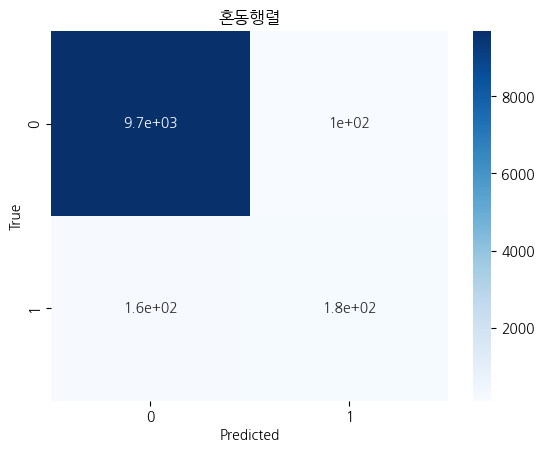

In [ ]:
X_te = test.drop('label', axis=1)
y_te = test['label']
param_grid = {
    'learning_rate': 0.19923246095672892, 'n_estimators': 192, 'max_depth': 7, 'min_child_samples': 4, 'subsample': 0.9013867731950886, 'colsample_bytree': 0.8161215080084934
}

model = LGBMClassifier(**param_grid, random_state=42)
model.fit(X_resampled, y_resampled)
# test_pred = model.predict(xtest)
y_test_probs = model.predict_proba(X_te)[:, 1]
test_pred = (y_test_probs >= 0.5).astype(int)


precision = precision_score(y_te, test_pred)
recall = recall_score(y_te, test_pred)
accuracy = accuracy_score(y_te, test_pred)
conf_matrix = confusion_matrix(y_te, test_pred)
f1_score_value = f1_score(y_te, test_pred)
roc_auc = roc_auc_score(y_te, y_test_probs)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1_score_value)  # Use the renamed variable
print("Confusion Matrix:")
print(conf_matrix)
unique_values, counts = np.unique(test_pred, return_counts=True)

# Display the results
for value, count in zip(unique_values, counts):
    print(f"{value}: {count} times")

print(y_te.value_counts())

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('혼동행렬')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Precision: 0.38372093023255816
Recall: 0.3826086956521739
Accuracy: 0.9580909180554186
ROC AUC Score: 0.8998431776353554
F1 Score: 0.3831640058055153
Confusion Matrix:
[[9584  212]
 [ 213  132]]
0: 9797 times
1: 344 times
0    9796
1     345
Name: label, dtype: int64


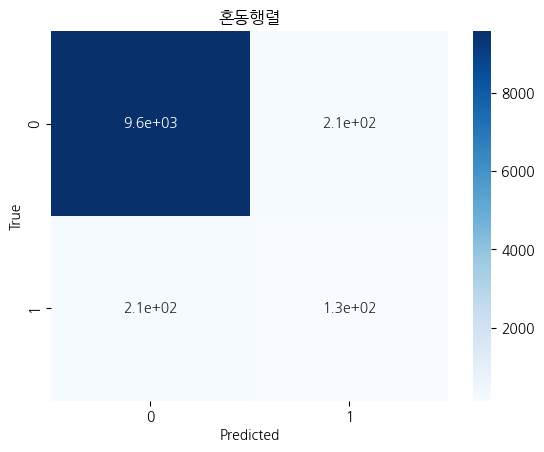

In [ ]:
X_te = test.drop('label', axis=1)
y_te = test['label']
param_grid = {
    'C': 8.689002207900677, 'max_iter': 323
}

model = LogisticRegression(**param_grid, random_state=42)
model.fit(X_resampled, y_resampled)
# test_pred = model.predict(xtest)
y_test_probs = model.predict_proba(X_te)[:, 1]
test_pred = (y_test_probs >= 0.5).astype(int)


precision = precision_score(y_te, test_pred)
recall = recall_score(y_te, test_pred)
accuracy = accuracy_score(y_te, test_pred)
conf_matrix = confusion_matrix(y_te, test_pred)
f1_score_value = f1_score(y_te, test_pred)
roc_auc = roc_auc_score(y_te, y_test_probs)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1_score_value)  # Use the renamed variable
print("Confusion Matrix:")
print(conf_matrix)
unique_values, counts = np.unique(test_pred, return_counts=True)

# Display the results
for value, count in zip(unique_values, counts):
    print(f"{value}: {count} times")

print(y_te.value_counts())

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('혼동행렬')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Precision: 0.38
Recall: 0.5507246376811594
Accuracy: 0.9541465338723991
ROC AUC Score: 0.8997742349731628
F1 Score: 0.44970414201183434
Confusion Matrix:
[[9486  310]
 [ 155  190]]
0: 9641 times
1: 500 times
0    9796
1     345
Name: label, dtype: int64


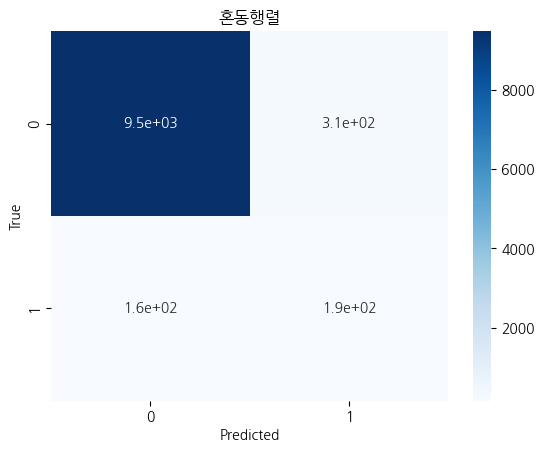

In [ ]:
X_te = test.drop('label', axis=1)
y_te = test['label']
param_grid = {
    'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.8328335839391356
}

model = DecisionTreeClassifier(**param_grid, random_state=42)
model.fit(X_resampled, y_resampled)
# test_pred = model.predict(xtest)
y_test_probs = model.predict_proba(X_te)[:, 1]
test_pred = (y_test_probs >= 0.5).astype(int)


precision = precision_score(y_te, test_pred)
recall = recall_score(y_te, test_pred)
accuracy = accuracy_score(y_te, test_pred)
conf_matrix = confusion_matrix(y_te, test_pred)
f1_score_value = f1_score(y_te, test_pred)
roc_auc = roc_auc_score(y_te, y_test_probs)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1_score_value)  # Use the renamed variable
print("Confusion Matrix:")
print(conf_matrix)
unique_values, counts = np.unique(test_pred, return_counts=True)

# Display the results
for value, count in zip(unique_values, counts):
    print(f"{value}: {count} times")

print(y_te.value_counts())

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('혼동행렬')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Precision: 0.4223744292237443
Recall: 0.5362318840579711
Accuracy: 0.9592742333103245
ROC AUC Score: 0.9382292979684106
F1 Score: 0.4725415070242657
Confusion Matrix:
[[9543  253]
 [ 160  185]]
0: 9703 times
1: 438 times
0    9796
1     345
Name: label, dtype: int64


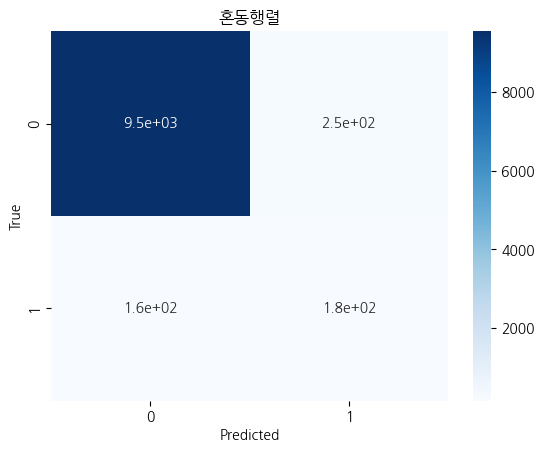

In [ ]:
test = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
X_te = test.drop('label', axis=1)
y_te = test['label']
param_grid = {
    'n_estimators': 162, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.8644900875455609
}

model = RandomForestClassifier(**param_grid, random_state=42)
model.fit(X_resampled, y_resampled)
# test_pred = model.predict(xtest)
y_test_probs = model.predict_proba(X_te)[:, 1]
test_pred = (y_test_probs >= 0.5).astype(int)


precision = precision_score(y_te, test_pred)
recall = recall_score(y_te, test_pred)
accuracy = accuracy_score(y_te, test_pred)
conf_matrix = confusion_matrix(y_te, test_pred)
f1_score_value = f1_score(y_te, test_pred)
roc_auc = roc_auc_score(y_te, y_test_probs)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("F1 Score:", f1_score_value)  # Use the renamed variable
print("Confusion Matrix:")
print(conf_matrix)
unique_values, counts = np.unique(test_pred, return_counts=True)

# Display the results
for value, count in zip(unique_values, counts):
    print(f"{value}: {count} times")

print(y_te.value_counts())

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('혼동행렬')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# test = pd.concat([xtest.reset_index(drop=True), ytest.reset_index(drop=True)], axis=1)
# # xtest.drop(drop_list, axis=1, inplace=True)
# X_te = test.drop('label', axis=1)
# y_te = test['label']
# param_grid = {
#     'learning_rate': 0.18924208199096018, 'n_estimators': 164, 'depth': 7, 'min_child_samples': 5, 'subsample': 0.8654021387499561, 'colsample_bylevel': 0.8919281767259302
# }

# model = CatBoostClassifier(**param_grid, random_state=42)
# model.fit(X_resampled, y_resampled)
# test_pred = model.predict(xtest)
# y_test_probs = model.predict_proba(X_te)[:, 1]

# precision = precision_score(ytest, test_pred)
# recall = recall_score(ytest, test_pred)
# accuracy = accuracy_score(ytest, test_pred)
# conf_matrix = confusion_matrix(y_te, test_pred)
# f1_score_value = f1_score(y_te, test_pred)
# roc_auc = roc_auc_score(y_te, y_test_probs)

# print("Precision:", precision)
# print("Recall:", recall)
# print("Accuracy:", accuracy)
# print("ROC AUC Score:", roc_auc)
# print("F1 Score:", f1_score_value)  # Use the renamed variable
# print("Confusion Matrix:")
# print(conf_matrix)
# unique_values, counts = np.unique(test_pred, return_counts=True)

# # Display the results
# for value, count in zip(unique_values, counts):
#     print(f"{value}: {count} times")

# print(y_te.value_counts())

# sns.heatmap(conf_matrix, annot=True, cmap='Blues')
# plt.title('혼동행렬')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

In [ ]:
# test = pd.concat([xtest.reset_index(drop=True), ytest.reset_index(drop=True)], axis=1)
# # xtest.drop(drop_list, axis=1, inplace=True)
# X_te = test.drop('label', axis=1)
# y_te = test['label']
# param_grid = {
#     'learning_rate': 0.17043689268859882, 'n_estimators': 198, 'max_depth': 7, 'min_child_weight': 2, 'subsample': 0.867489843657589, 'colsample_bytree': 0.8937889835929025
# }

# model = XGBClassifier(**param_grid, random_state=42)
# model.fit(X_resampled, y_resampled)
# test_pred = model.predict(xtest)
# y_test_probs = model.predict_proba(X_te)[:, 1]

# precision = precision_score(ytest, test_pred)
# recall = recall_score(ytest, test_pred)
# accuracy = accuracy_score(ytest, test_pred)
# conf_matrix = confusion_matrix(y_te, test_pred)
# f1_score_value = f1_score(y_te, test_pred)
# roc_auc = roc_auc_score(y_te, y_test_probs)

# print("Precision:", precision)
# print("Recall:", recall)
# print("Accuracy:", accuracy)
# print("ROC AUC Score:", roc_auc)
# print("F1 Score:", f1_score_value)  # Use the renamed variable
# print("Confusion Matrix:")
# print(conf_matrix)
# unique_values, counts = np.unique(test_pred, return_counts=True)

# # Display the results
# for value, count in zip(unique_values, counts):
#     print(f"{value}: {count} times")

# print(y_te.value_counts())

# sns.heatmap(conf_matrix, annot=True, cmap='Blues')
# plt.title('혼동행렬')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

In [ ]:
# # 모델설정
# X = df2.drop('label', axis=1)
# y = df2['label']
# sm = SMOTE(sampling_strategy=0.3, random_state=42)

# # train데이터를 넣어 복제함
# X_resampled, y_resampled = sm.fit_resample(X, y)

# print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(X_resampled.shape))

# # # 모델설정
# # sm = SMOTE(sampling_strategy=0.5, random_state=42)

# # # train데이터를 넣어 복제함
# # X_resampled, y_resampled = sm.fit_resample(x_train, y_train)

# # print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape))
# # print('After OverSampling, the shape of train_y: {} \n'.format(X_resampled.shape))


# y_resampled = pd.DataFrame(y_resampled)
# print(f'오버샘플링 이후 클래스 분포 \n {y_resampled.value_counts()}')



# df2.describe()

### 언더샘플링 결과값

In [ ]:
def make_score_param_resample_under(model_type, param_grid):
  X_te = test.drop('label', axis=1)
  y_te = test['label']

  model = model_type(**param_grid, random_state=42)
  model.fit(X_resampled, y_resampled)
  # test_pred = model.predict(xtest)
  y_test_probs = model.predict_proba(X_te)[:, 1]
  test_pred = (y_test_probs >= 0.85).astype(int)


  precision = precision_score(y_te, test_pred)
  recall = recall_score(y_te, test_pred)
  accuracy = accuracy_score(y_te, test_pred)
  conf_matrix = confusion_matrix(y_te, test_pred)
  f1_score_value = f1_score(y_te, test_pred)
  roc_auc = roc_auc_score(y_te, y_test_probs)

  print("Precision:", precision)
  print("Recall:", recall)
  print("Accuracy:", accuracy)
  print("ROC AUC Score:", roc_auc)
  print("F1 Score:", f1_score_value)  # Use the renamed variable
  print("Confusion Matrix:")
  print(conf_matrix)
  unique_values, counts = np.unique(test_pred, return_counts=True)

  # Display the results
  for value, count in zip(unique_values, counts):
      print(f"{value}: {count} times")

  print(y_te.value_counts())

  sns.heatmap(conf_matrix, annot=True, cmap='Blues')
  plt.title('혼동행렬')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

Precision: 0.43537414965986393
Recall: 0.419672131147541
Accuracy: 0.966042966042966
ROC AUC Score: 0.9350988024553347
F1 Score: 0.4273789649415693
Confusion Matrix:
[[9630  166]
 [ 177  128]]
0: 9807 times
1: 294 times
0    9796
1     305
Name: label, dtype: int64


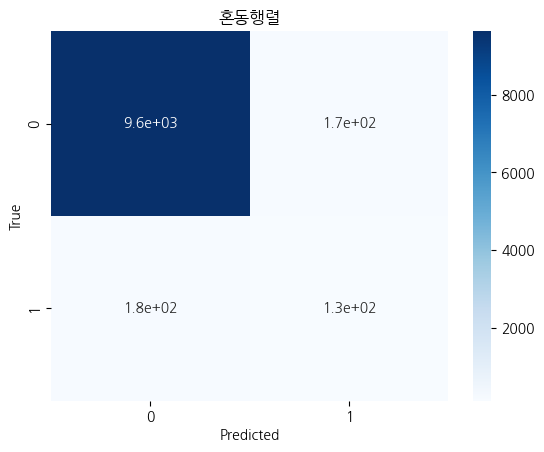

In [ ]:
make_score_param_resample_under(XGBClassifier, {
    'learning_rate': 0.16691396312027973, 'n_estimators': 63, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.9063500553405022, 'colsample_bytree': 0.8478995970031279
})

0:	learn: 0.4963744	total: 43.2ms	remaining: 8.61s
1:	learn: 0.3780123	total: 62.1ms	remaining: 6.15s
2:	learn: 0.3220981	total: 78.9ms	remaining: 5.18s
3:	learn: 0.2892701	total: 95.1ms	remaining: 4.66s
4:	learn: 0.2676210	total: 112ms	remaining: 4.37s
5:	learn: 0.2528962	total: 129ms	remaining: 4.16s
6:	learn: 0.2421124	total: 145ms	remaining: 4s
7:	learn: 0.2338962	total: 165ms	remaining: 3.96s
8:	learn: 0.2278060	total: 182ms	remaining: 3.87s
9:	learn: 0.2223318	total: 199ms	remaining: 3.79s
10:	learn: 0.2171711	total: 217ms	remaining: 3.73s
11:	learn: 0.2125021	total: 236ms	remaining: 3.69s
12:	learn: 0.2097251	total: 251ms	remaining: 3.62s
13:	learn: 0.2061267	total: 269ms	remaining: 3.58s
14:	learn: 0.2026686	total: 286ms	remaining: 3.52s
15:	learn: 0.2002036	total: 303ms	remaining: 3.48s
16:	learn: 0.1976074	total: 324ms	remaining: 3.49s
17:	learn: 0.1957578	total: 340ms	remaining: 3.44s
18:	learn: 0.1939403	total: 358ms	remaining: 3.41s
19:	learn: 0.1922762	total: 375ms	remain

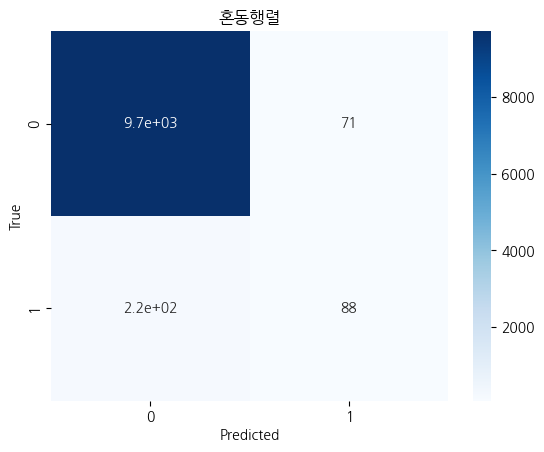

In [ ]:
amake_score_param_resample_under(CatBoostClassifier, {
    'learning_rate': 0.1882960971404196, 'iterations': 200, 'depth': 7, 'min_child_samples': 1, 'subsample': 0.8972747167012467, 'colsample_bylevel': 0.916931690958365
})

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 9142, number of negative: 22856
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 31998, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.285705 -> initscore=-0.916334
[LightGBM] [Info] Start training from score -0.916334
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Precision: 0.5280898876404494
Recall: 

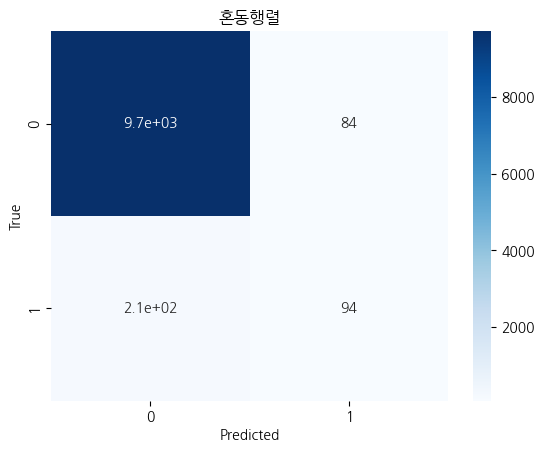

In [ ]:
make_score_param_resample_under(LGBMClassifier, {
    'learning_rate': 0.1996347737278885, 'n_estimators': 190, 'max_depth': 7, 'min_child_samples': 5, 'subsample': 0.9234586484384226, 'colsample_bytree': 0.8211984721645279
})

Precision: 0.5208333333333334
Recall: 0.16393442622950818
Accuracy: 0.9702009702009702
ROC AUC Score: 0.9237258097985797
F1 Score: 0.24937655860349126
Confusion Matrix:
[[9750   46]
 [ 255   50]]
0: 10005 times
1: 96 times
0    9796
1     305
Name: label, dtype: int64


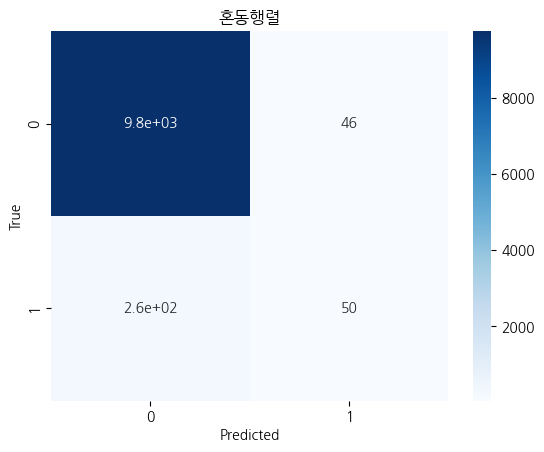

In [ ]:
make_score_param_resample_under(RandomForestClassifier, {
    'n_estimators': 200, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': 0.7833379035023933
})

Precision: 0.3188405797101449
Recall: 0.36065573770491804
Accuracy: 0.9574299574299574
ROC AUC Score: 0.8841989704730603
F1 Score: 0.3384615384615384
Confusion Matrix:
[[9561  235]
 [ 195  110]]
0: 9756 times
1: 345 times
0    9796
1     305
Name: label, dtype: int64


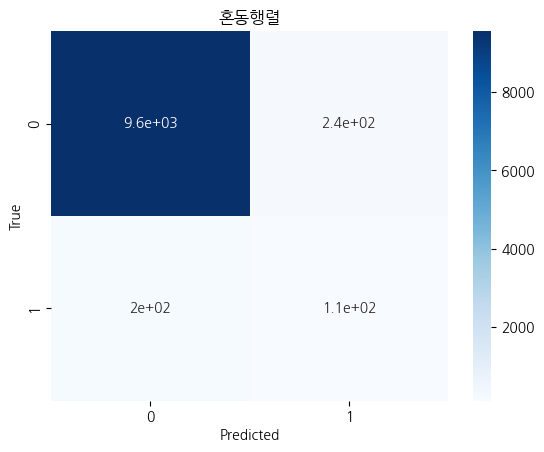

In [ ]:
make_score_param_resample_under(DecisionTreeClassifier, {
    'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 0.9913775906893642
})

Precision: 0.3062200956937799
Recall: 0.2098360655737705
Accuracy: 0.9617859617859618
ROC AUC Score: 0.8752926922330291
F1 Score: 0.2490272373540856
Confusion Matrix:
[[9651  145]
 [ 241   64]]
0: 9892 times
1: 209 times
0    9796
1     305
Name: label, dtype: int64


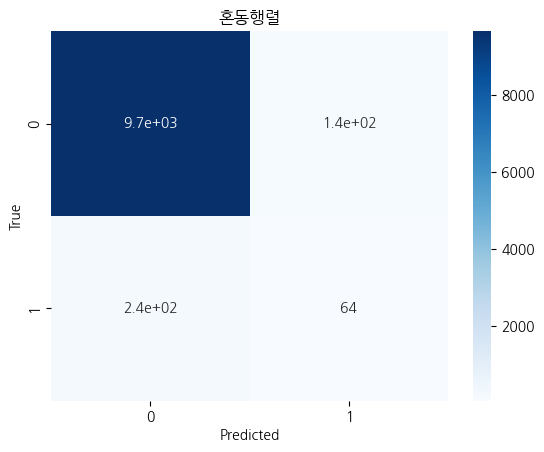

In [ ]:
make_score_param_resample_under(LogisticRegression, {
    'C': 7.630402906988952, 'max_iter': 448
})

## cross_val_score

In [ ]:
xgb_param = {'learning_rate': 0.1376659633427028, 'n_estimators': 191, 'max_depth': 6, 'min_child_weight': 3, 'subsample': 0.9165726493889653, 'colsample_bytree': 0.8579536962223269}
cat_param = {'learning_rate': 0.18877844296522112, 'iterations': 88, 'depth': 5, 'min_child_samples': 5, 'subsample': 0.9464765445542969, 'colsample_bylevel': 0.854020774277296}
gbm_param = {'learning_rate': 0.11288977490136533, 'n_estimators': 174, 'max_depth': 3, 'min_child_samples': 4, 'subsample': 0.8789151275244558, 'colsample_bytree': 0.9624149079667592}
lr_param = {'C': 3.1236003953034577, 'max_iter': 371}
dt_param = {'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 7, 'max_features': 0.5668283636148712}
rf_param = {'n_estimators': 120, 'max_depth': 7, 'min_samples_split': 13, 'min_samples_leaf': 4, 'max_features': 0.8193530155371512}

In [ ]:
# Define preprocessing steps
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define CatBoostClassifier model
model = CatBoostClassifier(random_state=42, verbose=0, **cat_param)

# Combine preprocessing and modeling into a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Define cross-validation strategy
fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store scores
precision_scores = []
recall_scores = []
accuracy_scores = []
f1_scores = []
roc_auc_scores = []
X_train_val = cop_concat_winsorized[select_fe_final]
# Perform cross-validation
for train_idx, valid_idx in fold.split(X_train_val, label):
    X_tr, X_val = X_train_val.iloc[train_idx], X_train_val.iloc[valid_idx]
    y_tr, y_val = label.iloc[train_idx], label.iloc[valid_idx]

    # Fit pipeline on training data
    pipeline.fit(X_tr, y_tr)

    # Predict on validation data
    pred_proba = pipeline.predict_proba(X_val)[:, 1]
    pred = (pred_proba >= 0.3).astype(int)

    # Calculate evaluation metrics
    precision = precision_score(y_val, pred)
    recall = recall_score(y_val, pred)
    accuracy = accuracy_score(y_val, pred)
    f1 = f1_score(y_val, pred)
    roc_auc = roc_auc_score(y_val, pred_proba)



    # Append scores to lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Calculate mean scores
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores)
mean_roc_auc = np.mean(roc_auc_scores)

# Print mean scores
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean Accuracy:", mean_accuracy)
print("Mean F1 Score:", mean_f1)
print("Mean ROC AUC:", mean_roc_auc)


Mean Precision: 0.5099774663987046
Mean Recall: 0.4261793826441468
Mean Accuracy: 0.9702982232393997
Mean F1 Score: 0.4639511657436626
Mean ROC AUC: 0.9417165389795882


In [ ]:
# Define preprocessing steps
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define CatBoostClassifier model
model = XGBClassifier(random_state=42, verbose=0, **xgb_param)

# Combine preprocessing and modeling into a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Define cross-validation strategy
fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store scores
precision_scores = []
recall_scores = []
accuracy_scores = []
f1_scores = []
roc_auc_scores = []
X_train_val = cop_concat_winsorized[select_fe_final]
# Perform cross-validation
for train_idx, valid_idx in fold.split(X_train_val, label):
    X_tr, X_val = X_train_val.iloc[train_idx], X_train_val.iloc[valid_idx]
    y_tr, y_val = label.iloc[train_idx], label.iloc[valid_idx]

    # Fit pipeline on training data
    pipeline.fit(X_tr, y_tr)

    # Predict on validation data
    pred_proba = pipeline.predict_proba(X_val)[:, 1]
    pred = (pred_proba >= 0.3).astype(int)

    # Calculate evaluation metrics
    precision = precision_score(y_val, pred)
    recall = recall_score(y_val, pred)
    accuracy = accuracy_score(y_val, pred)
    f1 = f1_score(y_val, pred)
    roc_auc = roc_auc_score(y_val, pred_proba)



    # Append scores to lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Calculate mean scores
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores)
mean_roc_auc = np.mean(roc_auc_scores)

# Print mean scores
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean Accuracy:", mean_accuracy)
print("Mean F1 Score:", mean_f1)
print("Mean ROC AUC:", mean_roc_auc)


Mean Precision: 0.4891298247518012
Mean Recall: 0.4272277227722772
Mean Accuracy: 0.9691992515521928
Mean F1 Score: 0.4551702404553035
Mean ROC AUC: 0.9384053592280704


In [ ]:
# Define preprocessing steps
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define CatBoostClassifier model
model = LGBMClassifier(random_state=42, verbose=0, **gbm_param)

# Combine preprocessing and modeling into a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Define cross-validation strategy
fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store scores
precision_scores = []
recall_scores = []
accuracy_scores = []
f1_scores = []
roc_auc_scores = []
X_train_val = cop_concat_winsorized[select_fe_final]
# Perform cross-validation
for train_idx, valid_idx in fold.split(X_train_val, label):
    X_tr, X_val = X_train_val.iloc[train_idx], X_train_val.iloc[valid_idx]
    y_tr, y_val = label.iloc[train_idx], label.iloc[valid_idx]

    # Fit pipeline on training data
    pipeline.fit(X_tr, y_tr)

    # Predict on validation data
    pred_proba = pipeline.predict_proba(X_val)[:, 1]
    pred = (pred_proba >= 0.3).astype(int)

    # Calculate evaluation metrics
    precision = precision_score(y_val, pred)
    recall = recall_score(y_val, pred)
    accuracy = accuracy_score(y_val, pred)
    f1 = f1_score(y_val, pred)
    roc_auc = roc_auc_score(y_val, pred_proba)



    # Append scores to lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Calculate mean scores
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores)
mean_roc_auc = np.mean(roc_auc_scores)

# Print mean scores
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean Accuracy:", mean_accuracy)
print("Mean F1 Score:", mean_f1)
print("Mean ROC AUC:", mean_roc_auc)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Mean Precision: 0.4911218246360324
Mean Recall: 0.4449524364201126
Mean Accuracy: 0.9693180340239163
Mean F1 Score: 0.46632024587741716
Mean ROC AUC: 0.9398914108474921


In [ ]:
# Define preprocessing steps
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define CatBoostClassifier model
model = DecisionTreeClassifier(random_state=42,  **dt_param)

# Combine preprocessing and modeling into a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Define cross-validation strategy
fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store scores
precision_scores = []
recall_scores = []
accuracy_scores = []
f1_scores = []
roc_auc_scores = []
X_train_val = cop_concat_winsorized[select_fe_final]
# Perform cross-validation
for train_idx, valid_idx in fold.split(X_train_val, label):
    X_tr, X_val = X_train_val.iloc[train_idx], X_train_val.iloc[valid_idx]
    y_tr, y_val = label.iloc[train_idx], label.iloc[valid_idx]

    # Fit pipeline on training data
    pipeline.fit(X_tr, y_tr)

    # Predict on validation data
    pred_proba = pipeline.predict_proba(X_val)[:, 1]
    pred = (pred_proba >= 0.3).astype(int)

    # Calculate evaluation metrics
    precision = precision_score(y_val, pred)
    recall = recall_score(y_val, pred)
    accuracy = accuracy_score(y_val, pred)
    f1 = f1_score(y_val, pred)
    roc_auc = roc_auc_score(y_val, pred_proba)



    # Append scores to lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Calculate mean scores
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores)
mean_roc_auc = np.mean(roc_auc_scores)

# Print mean scores
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean Accuracy:", mean_accuracy)
print("Mean F1 Score:", mean_f1)
print("Mean ROC AUC:", mean_roc_auc)


Mean Precision: 0.3434706293103101
Mean Recall: 0.3553581828771112
Mean Accuracy: 0.9596651008415714
Mean F1 Score: 0.3458139219496551
Mean ROC AUC: 0.8745934029220288


In [ ]:
# Define preprocessing steps
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define CatBoostClassifier model
model = RandomForestClassifier(random_state=42,  **rf_param)

# Combine preprocessing and modeling into a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Define cross-validation strategy
fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store scores
precision_scores = []
recall_scores = []
accuracy_scores = []
f1_scores = []
roc_auc_scores = []
X_train_val = cop_concat_winsorized[select_fe_final]
# Perform cross-validation
for train_idx, valid_idx in fold.split(X_train_val, label):
    X_tr, X_val = X_train_val.iloc[train_idx], X_train_val.iloc[valid_idx]
    y_tr, y_val = label.iloc[train_idx], label.iloc[valid_idx]

    # Fit pipeline on training data
    pipeline.fit(X_tr, y_tr)

    # Predict on validation data
    pred_proba = pipeline.predict_proba(X_val)[:, 1]
    pred = (pred_proba >= 0.3).astype(int)

    # Calculate evaluation metrics
    precision = precision_score(y_val, pred)
    recall = recall_score(y_val, pred)
    accuracy = accuracy_score(y_val, pred)
    f1 = f1_score(y_val, pred)
    roc_auc = roc_auc_score(y_val, pred_proba)



    # Append scores to lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Calculate mean scores
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores)
mean_roc_auc = np.mean(roc_auc_scores)

# Print mean scores
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean Accuracy:", mean_accuracy)
print("Mean F1 Score:", mean_f1)
print("Mean ROC AUC:", mean_roc_auc)


Mean Precision: 0.45054491220087217
Mean Recall: 0.32579110852261695
Mean Accuracy: 0.9675656793303853
Mean F1 Score: 0.37758633526796775
Mean ROC AUC: 0.9253136129796214


In [ ]:
# Define preprocessing steps
preprocessor = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define CatBoostClassifier model
model = LogisticRegression(random_state=42,  **lr_param)

# Combine preprocessing and modeling into a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])

# Define cross-validation strategy
fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store scores
precision_scores = []
recall_scores = []
accuracy_scores = []
f1_scores = []
roc_auc_scores = []
X_train_val = cop_concat_winsorized[select_fe_final]
# Perform cross-validation
for train_idx, valid_idx in fold.split(X_train_val, label):
    X_tr, X_val = X_train_val.iloc[train_idx], X_train_val.iloc[valid_idx]
    y_tr, y_val = label.iloc[train_idx], label.iloc[valid_idx]

    # Fit pipeline on training data
    pipeline.fit(X_tr, y_tr)

    # Predict on validation data
    pred_proba = pipeline.predict_proba(X_val)[:, 1]
    pred = (pred_proba >= 0.3).astype(int)

    # Calculate evaluation metrics
    precision = precision_score(y_val, pred)
    recall = recall_score(y_val, pred)
    accuracy = accuracy_score(y_val, pred)
    f1 = f1_score(y_val, pred)
    roc_auc = roc_auc_score(y_val, pred_proba)



    # Append scores to lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)

# Calculate mean scores
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_accuracy = np.mean(accuracy_scores)
mean_f1 = np.mean(f1_scores)
mean_roc_auc = np.mean(roc_auc_scores)

# Print mean scores
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean Accuracy:", mean_accuracy)
print("Mean F1 Score:", mean_f1)
print("Mean ROC AUC:", mean_roc_auc)


Mean Precision: 0.33944461868695297
Mean Recall: 0.15161133760434867
Mean Accuracy: 0.9654568625156861
Mean F1 Score: 0.20894272634384764
Mean ROC AUC: 0.8859093843761947


In [ ]:
col_rename_change

['기업순이익률1',
 '총자본증가율1',
 '자기자본구성비율1',
 '이자보상배율(이자비용)2',
 '유동자산구성비율1',
 '이자보상배율(이자비용)1',
 '종업원1',
 '종업원2',
 'CASH FLOW 대 총자본비율2',
 'label']

In [ ]:
feature_importance_df

,Feature,Importance
0,기업순이익률,27.18
4,유동자산구성비율,12.91
2,자기자본구성비율,10.87
3,이자보상배율(이자비용)_1,10.79
1,총자본증가율,10.08
6,종업원,9.96
7,종업원_1,8.96
5,이자보상배율(이자비용),6.07
8,CASH FLOW 대 총자본비율_1,3.19


In [ ]:
select_fe_final

['기업순이익률',
 '총자본증가율',
 '자기자본구성비율',
 '이자보상배율(이자비용)_1',
 '유동자산구성비율',
 '이자보상배율(이자비용)',
 '종업원',
 '종업원_1',
 'CASH FLOW 대 총자본비율_1']

In [ ]:
im_df

,기업순이익률1,총자본증가율1,자기자본구성비율1,이자보상배율(이자비용)2,유동자산구성비율1,이자보상배율(이자비용)1,종업원1,종업원2,CASH FLOW 대 총자본비율2
19592,1.31,8.98,0.39,1.03,3.57,1.05,8,8,5.02
23750,-2.87,30.57,18.12,999999999.00,1.45,999999999.00,0,0,-0.24
2549,-2.36,-9.75,20.88,-0.29,8.65,-1.00,11,11,-0.64
8484,3.62,12.05,80.07,999999999.00,26.84,16.58,626,626,7.60
22776,12.89,-30.05,10.08,1.08,96.16,2.79,3,3,4.10
...,...,...,...,...,...,...,...,...,...
2012,2.52,-8.33,18.02,0.91,24.45,0.95,4,4,-0.69
16556,5.78,5.21,29.21,5.90,62.80,5.25,87,87,12.11
4183,44.88,-20.10,20.88,-7.30,24.93,-10.17,1,1,-2.81
4577,-1.02,1.81,10.57,-0.20,23.44,-1.72,24,24,6.54


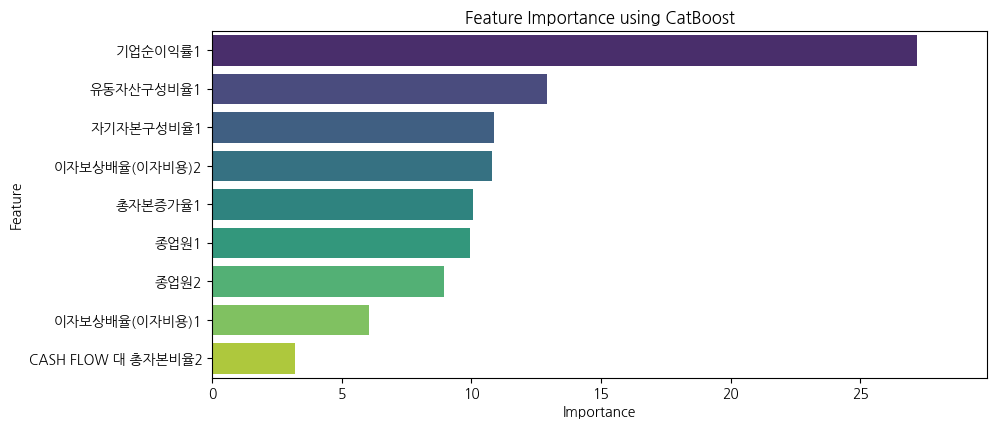

In [ ]:
model = CatBoostClassifier(random_state=42, verbose=0, **cat_param)
model.fit(X_train_se, y_train)
# 특성 중요도 추출
importance = model.feature_importances_
im_df = X_train[select_fe_final].copy()
im_df.columns = ['기업순이익률1',
 '총자본증가율1',
 '자기자본구성비율1',
 '이자보상배율(이자비용)2',
 '유동자산구성비율1',
 '이자보상배율(이자비용)1',
 '종업원1',
 '종업원2',
 'CASH FLOW 대 총자본비율2']
# 특성 중요도와 특성 이름을 데이터프레임으로 변환
feature_importance_df = pd.DataFrame({'Feature': im_df.columns, 'Importance': importance})

# 중요도에 따라 내림차순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 그래프 크기 조정
plt.figure(figsize=(10, len(feature_importance_df) * 0.5))

# Seaborn을 사용한 그래프 그리기
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# 특정 값의 범위를 제한 (예: 상위 15개의 특성만 표시)
plt.xlim(0, feature_importance_df['Importance'].iloc[:15].max() * 1.1)

plt.title('Feature Importance using CatBoost')
plt.show()